TP ESPECIAL FUNDAMENTOS DE LA CIENCIA DE DATOS 2024 

DATASET: CALIDAD DE AGUA DEL RÍO DE LA PLATA - 2022

INTEGRANTES:
Abril Valentina Valentina Juarez, Matias Müller Gonzales y Julián Elias Rivero

In [ ]:
# corroborar si funciona con % o con !

%pip install pandas
%pip install matplotlib
%pip install numpy
%pip install fancyimpute
%pip install scikit-learn
%pip install scipy
%pip install seaborn

# importar librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fancyimpute import IterativeImputer,KNN
from sklearn.impute import KNNImputer
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
import seaborn as sns



In [ ]:
raw_dataset = pd.read_csv("Calidad_de_agua_2022.csv", sep =";")

Desplegamos el dataset para realizar un vistazo generico

In [ ]:
#pd.reset_option('display.max_rows') - 
# descomentar lo de arriba si quiere que le muestre el dataset truncado!!!!
raw_dataset

,orden,sitios,codigo,fecha,año,campaña,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
0,1,Canal Villanueva y Río Luján,TI001,23/2/2022,2022,Verano,24.5,23.3,5.3,6.56,Ausencia,Ausencia,Ausencia,Presencia,2200,100,130,2.9,0.42,0.23,0.15,6.2,29,90,<0.10,<0.005,<0.001,<10,<0.20,55,Muy deteriorada
1,2,Río Lujan y Arroyo Caraguatá,TI006,23/2/2022,2022,Verano,25.4,23.3,2.25,6.56,Presencia,Presencia,Ausencia,Ausencia,1200,200,400,3.3,0.51,0.41,0.35,5.8,29,34,<0.10,<0.005,<0.001,<10,<0.20,42,Extremadamente deteriorada
2,3,Canal Aliviador y Río Lujan,TI002,23/2/2022,2022,Verano,24.6,23.3,2.94,6.59,Ausencia,Presencia,Ausencia,Ausencia,1800,200,580,6.5,0.05,0.59,0.54,1.9,29,17,<0.10,<0.005,<0.001,<10,0.2,45,Muy deteriorada
3,4,Río Carapachay y Arroyo Gallo Fiambre,TI003,23/2/2022,2022,Verano,25.2,23.3,2.22,7.45,Presencia,Presencia,Ausencia,Ausencia,1400,100,300,7.4,1,0.38,0.4,5.8,29,23,<0.10,<0.005,<0.001,<10,<0.20,46,Muy deteriorada
4,5,Río Reconquista y Río Lujan,TI004,23/2/2022,2022,Verano,24.1,20,1.02,6.39,Ausencia,Presencia,Ausencia,Presencia,1100,100,370,8.8,0.049,0.55,0.54,2.6,59,18,<0.10,<0.005,<0.001,<10,<0.20,44,Extremadamente deteriorada
5,6,Rio Tigre 100m antes del Rio Luján,TI005,23/2/2022,2022,Verano,24.9,23.3,3.5,6.53,Ausencia,Ausencia,Ausencia,Presencia,3200,200,750,4.4,3.5,1.1,0.91,3.9,130,8.9,<0.10,<0.005,<0.001,<10,<0.20,40,Extremadamente deteriorada
6,7,Río Lujan y Canal San Fernando,TI007,23/2/2022,2022,Verano,24.5,20,1.5,6.54,Ausencia,Presencia,Ausencia,Presencia,18000,1500,100,5.6,2,0.73,0.6,3.5,42,12,<0.10,<0.005,<0.001,<10,0.4,35,Extremadamente deteriorada
7,8,Río Capitán y Río San Antonio,TI008,23/2/2022,2022,Verano,24.5,21,6.3,6.48,Ausencia,Presencia,Ausencia,Ausencia,1000,200,1200,3.1,0.049,0.17,0.16,5.5,69,90,<0.10,<0.005,<0.001,<10,<0.20,46,Muy deteriorada
8,9,Arroyo Abra Vieja y Santa Rosa,TI009,23/2/2022,2022,Verano,23.4,21,4.49,6.76,Ausencia,Ausencia,Ausencia,Ausencia,400,100,220,1.9,0.1,0.21,0.19,1.9,29,39,<0.10,<0.005,<0.001,<10,<0.20,58,Muy deteriorada
9,10,Del Arca,SF015,23/2/2022,2022,Verano,21.5,23,3.85,6.66,Ausencia,Ausencia,Ausencia,Presencia,2200,100,270,5.4,0.049,0.28,0.39,1.9,29,28,<0.10,<0.005,<0.001,<10,<0.20,51,Muy deteriorada


Ahora le pedimos un poco de informacion para analizar contexto de los datos

In [ ]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   orden                    168 non-null    int64 
 1   sitios                   168 non-null    object
 2   codigo                   168 non-null    object
 3   fecha                    168 non-null    object
 4   año                      168 non-null    object
 5   campaña                  168 non-null    object
 6   tem_agua                 168 non-null    object
 7   tem_aire                 166 non-null    object
 8   od                       168 non-null    object
 9   ph                       168 non-null    object
 10  olores                   168 non-null    object
 11  color                    168 non-null    object
 12  espumas                  168 non-null    object
 13  mat_susp                 168 non-null    object
 14  colif_fecales_ufc_100ml  167 non-null    o

En total tenemos 31 columnas (atributos) y 168 filas (observaciones). Se puede ver que hay ciertas columnas con NULL y que el tipo de datos practicamente es OBJECT exceptuando la primer columna "orden" que es de tipo INT64.

In [ ]:
raw_dataset.head()

,orden,sitios,codigo,fecha,año,campaña,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
0,1,Canal Villanueva y Río Luján,TI001,23/2/2022,2022,Verano,24.5,23.3,5.3,6.56,Ausencia,Ausencia,Ausencia,Presencia,2200,100,130,2.9,0.42,0.23,0.15,6.2,29,90,<0.10,<0.005,<0.001,<10,<0.20,55,Muy deteriorada
1,2,Río Lujan y Arroyo Caraguatá,TI006,23/2/2022,2022,Verano,25.4,23.3,2.25,6.56,Presencia,Presencia,Ausencia,Ausencia,1200,200,400,3.3,0.51,0.41,0.35,5.8,29,34,<0.10,<0.005,<0.001,<10,<0.20,42,Extremadamente deteriorada
2,3,Canal Aliviador y Río Lujan,TI002,23/2/2022,2022,Verano,24.6,23.3,2.94,6.59,Ausencia,Presencia,Ausencia,Ausencia,1800,200,580,6.5,0.05,0.59,0.54,1.9,29,17,<0.10,<0.005,<0.001,<10,0.2,45,Muy deteriorada
3,4,Río Carapachay y Arroyo Gallo Fiambre,TI003,23/2/2022,2022,Verano,25.2,23.3,2.22,7.45,Presencia,Presencia,Ausencia,Ausencia,1400,100,300,7.4,1,0.38,0.4,5.8,29,23,<0.10,<0.005,<0.001,<10,<0.20,46,Muy deteriorada
4,5,Río Reconquista y Río Lujan,TI004,23/2/2022,2022,Verano,24.1,20,1.02,6.39,Ausencia,Presencia,Ausencia,Presencia,1100,100,370,8.8,0.049,0.55,0.54,2.6,59,18,<0.10,<0.005,<0.001,<10,<0.20,44,Extremadamente deteriorada


A simple vista veo que tendremos que tratar lo siguiente:
1) Hay valores que enves de tener un tipo de dato cuantitativo en el atributo, tienen un string categorico que dice "no se midio" o variantes del mismo, por ejemplo en OD(oxigeno disuelto), esto deberia de ser reemplazado NA.
2) Hay datos cuantitativos que adelante del valor numerico tienen un string "<", como en el caso de las mediciones de los contaminantes en el agua.
Podriamos generar un mapa que descriva las observaciones de dicha variable. 
3) Hay datos cualitativos nominales que indican "presencia" o "ausencia" de algún compuesto en el agua, estás variables son dicotomicas, seran reemplazados por {0, 1} de acuerdo a su impacto en la muestra. 
4) Hay datos cualitativos ordinales como "muy deteriorada" o "extremadamente deteriorada" que hacen referencia al agua de esa zona, seran reemplazados mediante transformacion "ordinal encoding" ya que el orden es significativo.

Veamos cuantos valores repetidos tiene el dataset

In [ ]:
raw_dataset.duplicated().sum()

np.int64(0)

Por lo visto no existe valores repetidos a simple vista.

Ya que empezaremos a modificar el dataset, una buena practica es copiar el dataset

In [ ]:
copy_dataset = raw_dataset.copy()

podemos eliminar columnas que no tienen mucho sentido, como por ejemplo "orden" y vamos a eliminar "año", ya que todas las observaciones se hicieron en 2022 y no agregan mucha informacion

In [ ]:
copy_dataset = copy_dataset.drop("orden",axis=1)
copy_dataset = copy_dataset.drop("año",axis=1)

Ahora vamos a ver que columnas tienen nulos

In [ ]:
copy_dataset.isna().sum()

sitios                      0
codigo                      0
fecha                       0
campaña                     0
tem_agua                    0
tem_aire                    2
od                          0
ph                          0
olores                      0
color                       0
espumas                     0
mat_susp                    0
colif_fecales_ufc_100ml     1
escher_coli_ufc_100ml       1
enteroc_ufc_100ml           1
nitrato_mg_l                0
nh4_mg_l                    0
p_total_l_mg_l              0
fosf_ortofos_mg_l           0
dbo_mg_l                    1
dqo_mg_l                    0
turbiedad_ntu               0
hidr_deriv_petr_ug_l        0
cr_total_mg_l               0
cd_total_mg_l               0
clorofila_a_ug_l            1
microcistina_ug_l           0
ica                        13
calidad_de_agua            14
dtype: int64

Pareciera que existen muy pocos nulos, pero vamos a ver que sucede con el "no se midió" , asi que vamos a mostrar algunos ejemplos

In [ ]:
copy_dataset[copy_dataset["dbo_mg_l"] == "no se midió"].head()

,sitios,codigo,fecha,campaña,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
10,Espigón La Farola,SI021,23/2/2022,Verano,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,NaN,NaN
12,Playa Espigón de Pacheco,SI024,23/2/2022,Verano,26.5,27,5.3,7.49,Ausencia,Ausencia,Ausencia,Ausencia,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,NaN,NaN
17,Parque de los Niños,CA041,23/2/2022,Verano,26.1,no se midió,4.8,7.4,Ausencia,Ausencia,Ausencia,Ausencia,1800,1300,10,4.6,1.2,0.24,0.2,no se midió,29,22,no se midió,<0.005,<0.002,no se midió,no se midió,54,Muy deteriorada
27,Náutico 400 m,QU062,23/2/2022,Verano,24,23,9.59,7.94,Ausencia,Ausencia,Ausencia,Ausencia,1000,100,10,5.7,0.06,0.39,0.29,no se midió,29,26,<0.10,<0.005,<0.001,28,1,48,Muy deteriorada
30,Puerto Trinidad calle 47,BZ077,23/2/2022,Verano,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,no se midió,NaN,NaN


Como pudimos ver hay muchisimos "no se midió" que representa NA, entonces vamos a convertir para todas las columnas
el "no se midió" y las distintas variantes a NA

In [ ]:
lista_columnas = copy_dataset.columns

for col in lista_columnas:
    copy_dataset[col] = copy_dataset[col].replace(['no midieron este día', 'no se midió', 'no se determinó','No se midió',
                                                   'no midio la sonda','NA'], pd.NA)

Una vez pasado todos los valores a NA vamos a contar cuantos NA tenemos por cada variable

In [ ]:
copy_dataset.isna().sum()

sitios                      0
codigo                      0
fecha                       5
campaña                     5
tem_agua                   23
tem_aire                   24
od                         36
ph                         28
olores                     13
color                      13
espumas                    13
mat_susp                   13
colif_fecales_ufc_100ml    15
escher_coli_ufc_100ml      15
enteroc_ufc_100ml          15
nitrato_mg_l               14
nh4_mg_l                   14
p_total_l_mg_l             21
fosf_ortofos_mg_l          14
dbo_mg_l                   58
dqo_mg_l                   14
turbiedad_ntu              14
hidr_deriv_petr_ug_l       18
cr_total_mg_l              17
cd_total_mg_l              17
clorofila_a_ug_l           18
microcistina_ug_l          18
ica                        14
calidad_de_agua            14
dtype: int64

In [ ]:
copy_dataset.isna().sum() / copy_dataset.shape[0]

sitios                    0.000
codigo                    0.000
fecha                     0.030
campaña                   0.030
tem_agua                  0.137
tem_aire                  0.143
od                        0.214
ph                        0.167
olores                    0.077
color                     0.077
espumas                   0.077
mat_susp                  0.077
colif_fecales_ufc_100ml   0.089
escher_coli_ufc_100ml     0.089
enteroc_ufc_100ml         0.089
nitrato_mg_l              0.083
nh4_mg_l                  0.083
p_total_l_mg_l            0.125
fosf_ortofos_mg_l         0.083
dbo_mg_l                  0.345
dqo_mg_l                  0.083
turbiedad_ntu             0.083
hidr_deriv_petr_ug_l      0.107
cr_total_mg_l             0.101
cd_total_mg_l             0.101
clorofila_a_ug_l          0.107
microcistina_ug_l         0.107
ica                       0.083
calidad_de_agua           0.083
dtype: float64

Además vemos que ninguna variable tiene más del 50% de valores faltantes, por ende no eliminaremos ninguna variable 

Se eliminaran todas aquellas observaciones que contengan 14 o mas atributos con valores NA, ya que no nos aportara mucha informacion

In [ ]:
copy_dataset = copy_dataset.dropna(thresh=14)

A continuacion estamos mostrando aquellas observaciones donde en la columna microcistina_ug_l se encuentran valores que deberian ser numericos, pero son de tipo object, porque hay texto combinado con numeros. Observamos que hay esto sucede en reiteradas ocasiones.

In [ ]:
copy_dataset[copy_dataset["microcistina_ug_l"] == " <0.15"].value_counts()

sitios                                 codigo  fecha      campaña   tem_agua  tem_aire  od     ph    olores     color      espumas   mat_susp   colif_fecales_ufc_100ml  escher_coli_ufc_100ml  enteroc_ufc_100ml  nitrato_mg_l  nh4_mg_l  p_total_l_mg_l  fosf_ortofos_mg_l  dbo_mg_l  dqo_mg_l  turbiedad_ntu  hidr_deriv_petr_ug_l  cr_total_mg_l  cd_total_mg_l  clorofila_a_ug_l  microcistina_ug_l  ica  calidad_de_agua           
Arroyo Abra Vieja y Santa Rosa         TI009   23/8/2022  invierno  15.6      15        8.68   7.13  Ausencia   Ausencia   Ausencia  Ausencia   3200                     2                      250                2.4           0.11      0.12            0.12               <2.0      <30       33              <0.10                <0.005         <0.001         200                <0.15             51   Muy deteriorada               1
Arroyo El Gato                         EN083   23/8/2022  invierno  12.8      9         2.49   8.01  Ausencia   Ausencia   Ausencia  Ausencia  

Para las siguientes columnas fue necesario quitar el string "<" y " <"(este caracter es el denominado NBSP)

In [ ]:
columnas = [
    "nh4_mg_l",
    "p_total_l_mg_l",
    "fosf_ortofos_mg_l",
    "dbo_mg_l",
    "dqo_mg_l",
    "turbiedad_ntu",
    "hidr_deriv_petr_ug_l",
    "cr_total_mg_l",
    "cd_total_mg_l",
    "clorofila_a_ug_l",
    "microcistina_ug_l"
]
for col in columnas:
    copy_dataset[col] = copy_dataset[col].str.strip("<")
    copy_dataset[col] = copy_dataset[col].str.strip(" <")

Ahora veamos la variable "cd_total_mg_l" y notaremos que a pesar de quitar el "<" el tipo de dato no cambio, sigue siendo de tipo object

In [ ]:
copy_dataset[copy_dataset["cd_total_mg_l"] == "0.001"].value_counts()

sitios                                 codigo  fecha      campaña   tem_agua  tem_aire  od     ph     olores     color      espumas    mat_susp   colif_fecales_ufc_100ml  escher_coli_ufc_100ml  enteroc_ufc_100ml  nitrato_mg_l  nh4_mg_l  p_total_l_mg_l  fosf_ortofos_mg_l  dbo_mg_l  dqo_mg_l  turbiedad_ntu  hidr_deriv_petr_ug_l  cr_total_mg_l  cd_total_mg_l  clorofila_a_ug_l  microcistina_ug_l  ica  calidad_de_agua           
Arroyo Abra Vieja y Santa Rosa         TI009   23/2/2022  Verano    23.4      21        4.49   6.76   Ausencia   Ausencia   Ausencia   Ausencia   400                      100                    220                1.9           0.1       0.21            0.19               1.9       29        39             0.10                  0.005          0.001          10                0.20               58   Muy deteriorada               1
                                               23/8/2022  invierno  15.6      15        8.68   7.13   Ausencia   Ausencia   Ausencia   Ause

Entonces para esta variable en particular vamos a realizar un mapeo para sustituir el tipo string a tipo entero

In [ ]:
mgl_map = {
    "0.001":0.001,
    "0.002":0.002
}
copy_dataset["cd_total_mg_l"] = copy_dataset["cd_total_mg_l"].map(mgl_map)
copy_dataset["cd_total_mg_l"].info()

<class 'pandas.core.series.Series'>
Index: 154 entries, 0 to 167
Series name: cd_total_mg_l
Non-Null Count  Dtype  
--------------  -----  
151 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB


Para la variable calidad_de_agua hicimos una transformacion ordinal encoding, donde cada valor unico de una caracteristica se mapea a un entero, tratando de ser lo mas cuidadoso para preservar el orden natural

In [ ]:
niveles_deterioro = {
    "Deteriorada" : 1,
    "Muy deteriorada" : 2,
    "Extremadamente deteriorada" : 3
}

copy_dataset["calidad_de_agua"] = copy_dataset["calidad_de_agua"].map(niveles_deterioro)

Para las siguientes variables continuaremos con un tipo de mapeo dicotomico

In [ ]:
mapeo_dicotomico = {
    "Ausencia" : 0,
    "Ausente" : 0,
    "ausencia" : 0,
    "presencia" : 1,
    "Presencia" : 1
}

copy_dataset["olores"] = copy_dataset["olores"].map(mapeo_dicotomico)
copy_dataset["color"] = copy_dataset["color"].map(mapeo_dicotomico)
copy_dataset["espumas"] = copy_dataset["espumas"].map(mapeo_dicotomico)
copy_dataset["mat_susp"] = copy_dataset["mat_susp"].map(mapeo_dicotomico)

A continuacion vamos a cambiar dos valores de la variable "fecha", ya que la fecha de la medicion se cargo como "31/10/0202" cuando en realidad intuimos que se quiso cargar "31/10/2022" debido a que todas las muestras fueron realizadas en dicho año

In [ ]:
copy_dataset["fecha"] = copy_dataset["fecha"].replace("31/10/0202", "31/10/2022")
copy_dataset["fecha"].value_counts()

fecha
4/5/2022      41
23/2/2022     39
23/8/2022     37
31/10/2022    37
Name: count, dtype: int64

Para tratar los NA vamos a operar con todas las columnas que lo posean, a traves de una serie de pasos
1_Convertir todas las variables a tipo numerico, exceptuando los NA(aquellos que no puedan convertirse, como los NA, seran convertidos a NAN)
2_Calcularemos la mediana para cada estacion del año
3_Con la funcion fillna, Asignaremos la mediana de cada estacion a los valores NAN en funcion de la columna a la que pertenezca

Decidimos hacer imputacion por mediana y por estacion, para mantener la distribucion de los datos lo mas equilibrada posible.

In [ ]:
columnas = [
    "tem_agua",
    "tem_aire",
    "od",
    "ph",
    "colif_fecales_ufc_100ml",
    "escher_coli_ufc_100ml",
    "enteroc_ufc_100ml",
    "nitrato_mg_l",
    "nh4_mg_l",
    "p_total_l_mg_l",
    "fosf_ortofos_mg_l",
    "dbo_mg_l",
    "dqo_mg_l",
    "turbiedad_ntu",
    "hidr_deriv_petr_ug_l",
    "cr_total_mg_l",
    "cd_total_mg_l",
    "clorofila_a_ug_l",
    "microcistina_ug_l",
    "ica"
]
for col in columnas:
    copy_dataset[col] = pd.to_numeric(copy_dataset[col], errors= 'coerce')
    
    median_verano = copy_dataset.loc[copy_dataset["campaña"] == "Verano", col].median()
    median_invierno = copy_dataset.loc[copy_dataset["campaña"] == "invierno", col].median()
    median_otoño = copy_dataset.loc[copy_dataset["campaña"] == "otoño", col].median()
    median_primavera = copy_dataset.loc[copy_dataset["campaña"] == "Primavera", col].median()
    
    copy_dataset.loc[(copy_dataset['campaña'] == 'Verano') & (copy_dataset[col].isna()), col] = median_verano
    copy_dataset.loc[(copy_dataset['campaña'] == 'invierno') & (copy_dataset[col].isna()), col] = median_invierno
    copy_dataset.loc[(copy_dataset['campaña'] == 'Primavera') & (copy_dataset[col].isna()), col] = median_primavera
    copy_dataset.loc[(copy_dataset['campaña'] == 'otoño') & (copy_dataset[col].isna()), col]=median_otoño

c:\Users\elret\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Vemos que devolvio una advertencia, lo que indica que para alguna columna no pudo calcular la mediana. indagamos un poco mas y es la columna "dbo_mg_l"

In [ ]:
#Filtramos las muestras donde la campaña es primavera y la columna "dbo_mg_l" = Nan
primavera_nan = copy_dataset[(copy_dataset['campaña'] == 'Primavera') & (copy_dataset['dbo_mg_l'].isna())]
print(primavera_nan)

                                    sitios    codigo       fecha    campaña  tem_agua  tem_aire     od    ph  olores  color  espumas  mat_susp  colif_fecales_ufc_100ml  escher_coli_ufc_100ml  enteroc_ufc_100ml  nitrato_mg_l  nh4_mg_l  p_total_l_mg_l  fosf_ortofos_mg_l  dbo_mg_l  dqo_mg_l  turbiedad_ntu  hidr_deriv_petr_ug_l  cr_total_mg_l  cd_total_mg_l  clorofila_a_ug_l  microcistina_ug_l  ica  calidad_de_agua
126           Canal Villanueva y Río Luján     TI001  31/10/2022  Primavera    21.500    15.000  8.300 7.000       0      0        0         0                  160.000                100.000            160.000         3.400     0.100           0.100              0.100       NaN        30         30.000                 0.100          0.005          0.001             0.300              0.150   61                2
127           Río Lujan y Arroyo Caraguatá     TI006  31/10/2022  Primavera    20.900    15.000  6.430 7.000       0      0        0         0                  200.000   

Observamos que para la columna "dbo_mg_l" para la campaña Primavera siguen habiendo ocurrencias Nan.
la mediana devuelve NaN, significa que no hay suficientes datos válidos en la campaña "Primavera" para calcular una mediana, y eso explicaría por qué no podemos reemplazar los valores NaN. En ese caso, podríamos intentar un enfoque alternativo, como usar un valor por defecto o una mediana calculada de otra campaña.

In [ ]:
# Calcular la mediana total de la columna 'dbo_mg_l' sin filtrar por campaña
median_total = copy_dataset['dbo_mg_l'].median()
# Reemplazar los valores NaN en 'dbo_mg_l' para la campaña 'Primavera' con la mediana total
copy_dataset.loc[(copy_dataset['campaña'] == 'Primavera') & (copy_dataset['dbo_mg_l'].isna()), 'dbo_mg_l'] = median_total


verificamos que se reemplazaron los Nan correctamente

In [ ]:
copy_dataset["dbo_mg_l"].isna().sum()

0      6.200
1      5.800
2      1.900
3      5.800
4      2.600
5      3.900
6      3.500
7      5.500
8      1.900
9      1.900
11     1.900
13     7.100
14     1.900
15     1.900
16     1.900
17     4.950
18    11.000
19     7.000
20     4.900
21     5.200
22     5.200
23     9.200
24    15.000
25    14.000
26     1.900
27     4.950
28     4.400
29    12.000
31     7.200
32     3.100
33     4.700
34     1.900
35     7.400
36     1.900
37     5.000
38     8.400
39     5.400
40     4.950
41     2.400
42     3.400
43     4.600
44     2.000
45     2.500
46     3.600
47     3.500
48     2.800
49     2.000
50     2.000
51     2.000
53     2.000
54     2.000
55     5.200
56     2.000
57     3.300
58     2.400
59     5.000
60     5.000
61     5.000
62     5.000
63     4.200
64     4.100
65     3.850
66     3.850
67     3.850
68     7.300
69     4.300
70     9.400
71    16.000
72    12.000
73    18.000
74     9.400
75     5.400
76     2.000
77    10.000
78     2.300
79     5.800
80     7.100

Ahora si estamos en condiciones!

Ahora vamos a comenzar con el Análisis Exploratorio de Datos(EDA).

Para empezar veamos que nos valores nos dice el HeatMap.

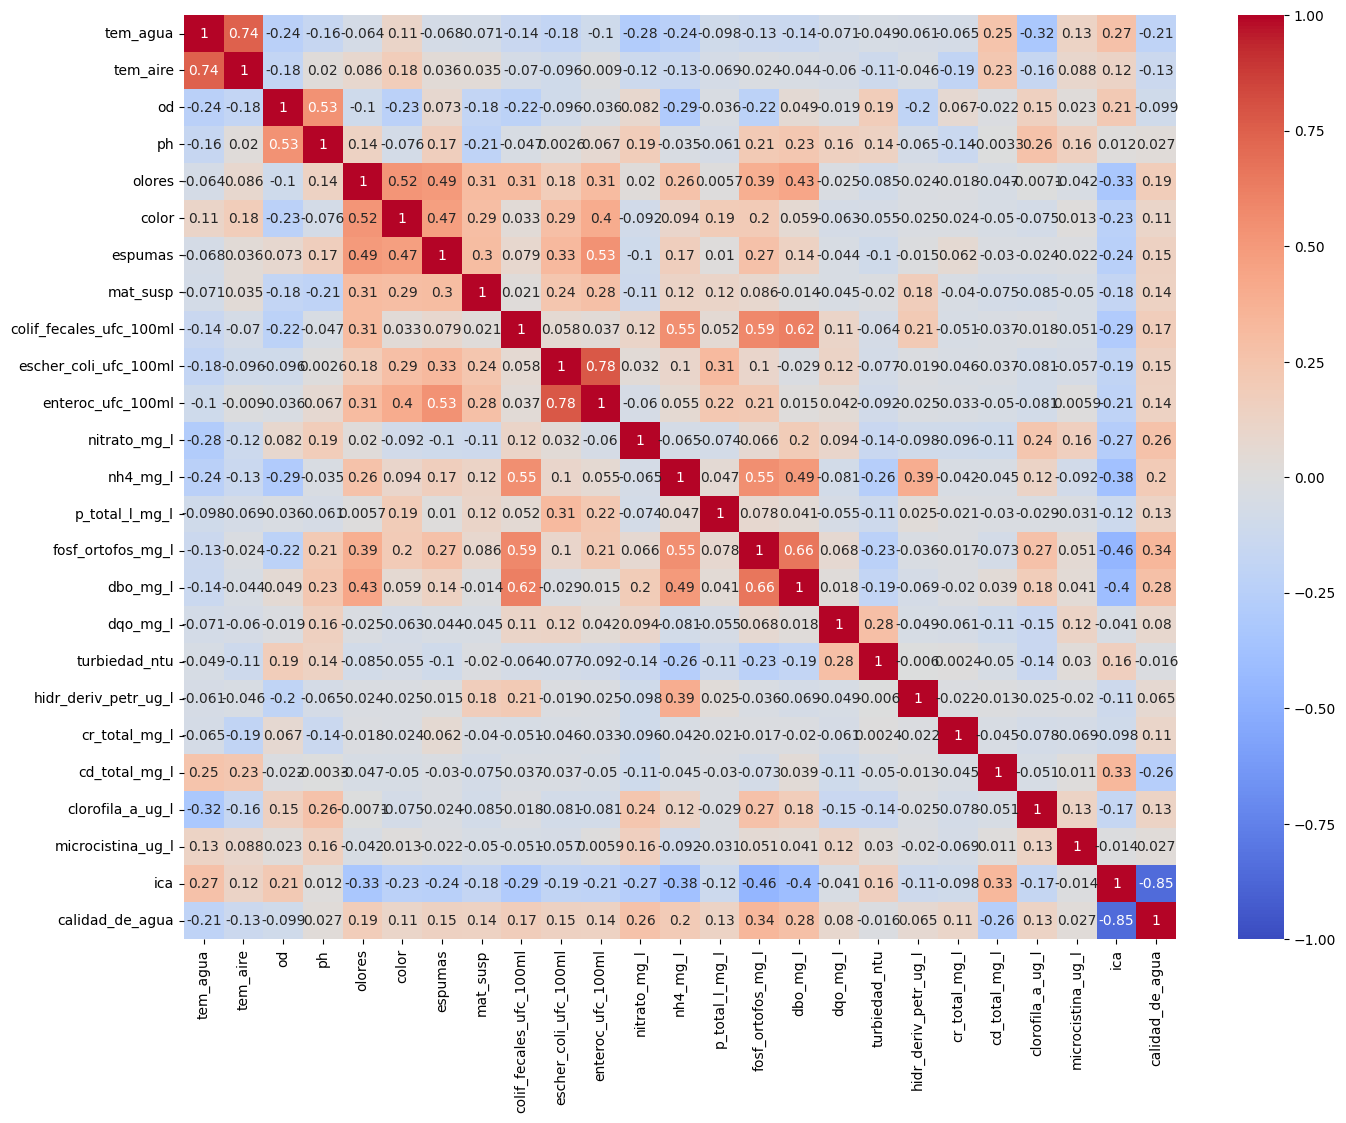

In [ ]:
matriz_correlacion = copy_dataset.drop(columns=["sitios","codigo","fecha","campaña"]).corr()
plt.figure(figsize=(16,12))
sns.heatmap(matriz_correlacion,vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

A simple vista podemos ver que es poco complicado ver entre tantos valores, pero resaltan algunas posibles relaciones, como por ejemplo:

Posiblemente exista una relacion entre las variables tem_aire y tem_agua, debido a que el coeficiente de correlacion es de 0.74

Tambien podemos ver que posiblemente exista una relacion entre las variables entero_ufc_100ml y escher_coli_ufc_100ml, debido a su coeficiente de correlacion de 0.78

Y por ultimo resalta la posible relacion entre las variables ica y calidad_de_agua, aunque parezca raro, se ve que son inversas

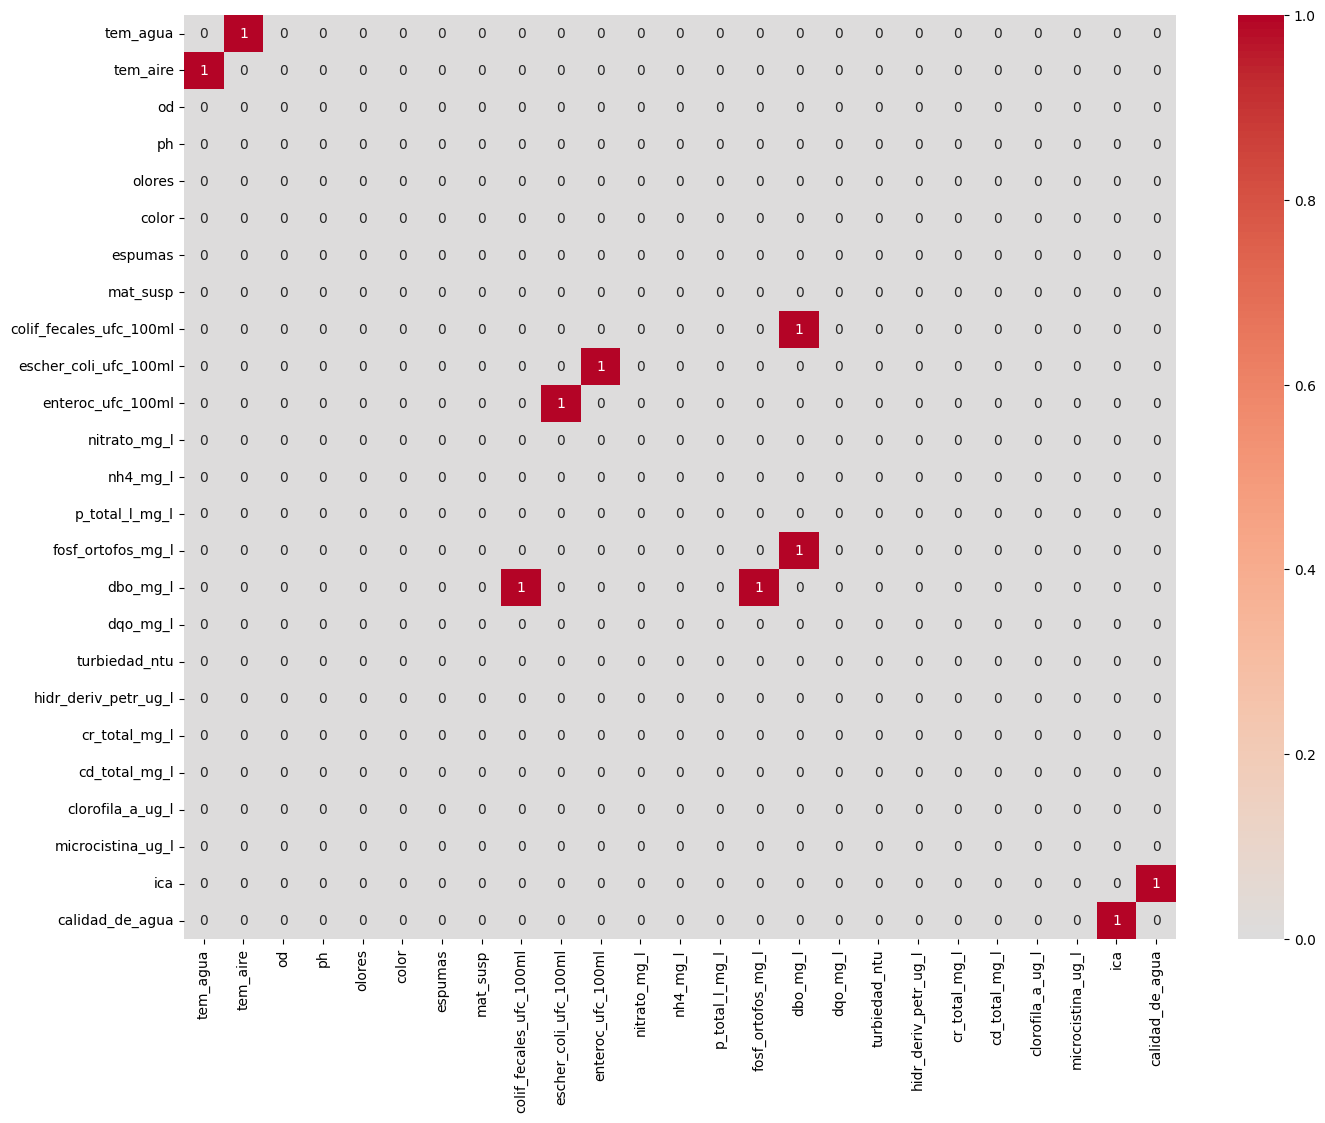

In [ ]:
# tomamos el valor absoluto de las correlaciones, umbralamos las mayores a 0.7
correlation_matrix_umbralizada = matriz_correlacion.abs() > 0.6
# aprovechamos y sacamos la diagonal
np.fill_diagonal(correlation_matrix_umbralizada.values, 0)

# e imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12));
sns.heatmap(correlation_matrix_umbralizada, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

Realizamos un describe para ver una serie de caracteristicas descriptivas

In [ ]:
#seteamos la opcion para que el dataset muestre los valores completos y no en notacion cientifica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
# Ajustes para que se muestren todas las filas y columnas sin truncamiento
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

In [ ]:
copy_dataset.describe()

,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
count,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000,154.000
mean,17.900,15.826,6.777,7.439,0.078,0.084,0.032,0.175,86140.292,4068.110,947.831,6.869,1.941,0.863,0.415,5.875,44.188,34.762,0.101,0.544,0.001,263.861,0.189,44.071,2.584
std,4.786,5.023,2.642,0.697,0.269,0.279,0.178,0.381,380084.458,15012.075,2999.021,4.043,4.120,3.386,0.309,4.571,23.477,23.854,0.008,1.946,0.000,816.715,0.159,8.949,0.520
min,6.000,4.000,0.360,5.000,0.000,0.000,0.000,0.000,80.000,1.000,2.000,1.900,0.049,0.100,0.100,1.900,29.000,2.500,0.100,0.005,0.001,0.000,0.150,23.000,1.000
25%,14.933,13.000,5.363,7.000,0.000,0.000,0.000,0.000,1200.000,100.000,57.500,3.700,0.103,0.270,0.230,3.625,30.000,18.050,0.100,0.005,0.001,10.000,0.150,38.000,2.000
50%,17.850,14.000,6.805,7.355,0.000,0.000,0.000,0.000,3900.000,330.000,300.000,5.850,0.650,0.370,0.330,5.000,30.000,27.500,0.100,0.005,0.001,10.000,0.150,42.000,3.000
75%,20.775,19.000,8.170,7.790,0.000,0.000,0.000,0.000,37500.000,1675.000,667.500,8.800,1.675,0.565,0.497,6.425,52.250,45.000,0.100,0.005,0.001,41.800,0.200,50.000,3.000
max,27.400,27.000,17.610,10.020,1.000,1.000,1.000,1.000,4200000.000,150000.000,28000.000,21.900,23.000,30.120,2.600,42.000,180.000,130.000,0.200,12.000,0.002,6410.000,1.670,76.000,3.000


Okey, vemos ciertas conductas en algunos indicadores:
- en el maximo valor de "Colif_fecales_ufc_100ml" (es absurdamente grande) siendo que hasta el 3er cuartil no acumula siquiera la mitad del maximo
- en "Fósforo total" o "p_total_l_mg_l" cuyo valor maximo es de 30.120 mg/L
- "Oxigeno Disuelto" tiene un minimo bastante chico, y un maximo bastante grande, entre los cuartiles no varia tanto
- olores, color, espumas y materia suspendia, fueron mapeadas por lo que no aportan mucho, podemos deducir que en la mayoria de los casos no estan presentes en el agua porque el promedio de cada una esta por debajo del 17%
- en "nh4_mg_l" o "Concentración de amonio"se observa un maximo muy superior a los demas valores
- tanto en DBO como en DQO, sus maximos son mas grandes que el valor acumulado hasta el 3er cuartil
- La turbiedad en promedio es 34.762 NTU, mientras que el minimo es de 2.5 NTU y el maximo de 130 NTU (bastante turbio jajaj)
- La "Concentración total de cromo" es bastante baja en promedio, pero el maximo esta muy alejado
- La "Concentración de clorofila" tiene un desvio estandar muy grande ya que el maximo esta muy alejado

Conforme vayamos avanzando, veremos en cuales indicadores deberemos de tomar alguna decision al respecto, si sacar los outliers o darles sentido, acorde a si son un posible error de muestreo, o tienen relevancia en la zona donde se extrajo esa muestra

Examinamos la distribucion de "colif_fecales_ufc_100ml" mediante BOX PLOT

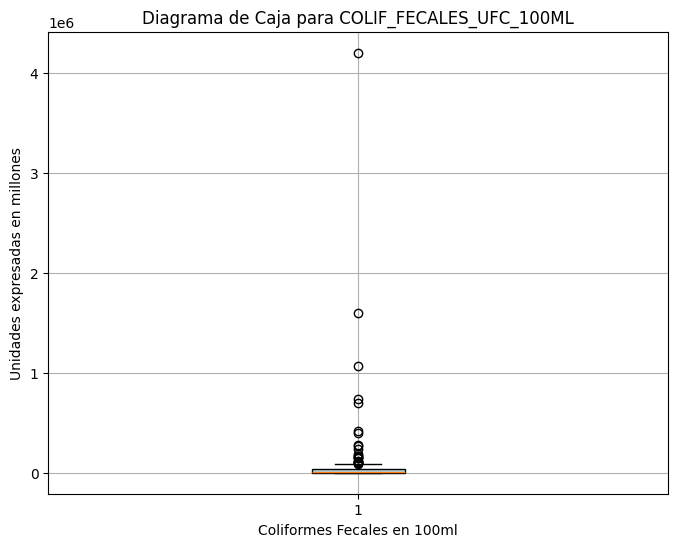

In [ ]:
plt.figure(figsize=(8, 6))

# Creamos BOXPLOT para ver como se distribuyen los datos
plt.boxplot(copy_dataset['colif_fecales_ufc_100ml'].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))

plt.title('Diagrama de Caja para COLIF_FECALES_UFC_100ML')
plt.xlabel('Coliformes Fecales en 100ml')
plt.ylabel('Unidades expresadas en millones')
plt.grid(True)

plt.show()

Vemos que hay outliers bastantes alejados del resto.. chusmeamos los 5 valores mas grandes.

In [ ]:
copy_dataset.nlargest(5, 'colif_fecales_ufc_100ml')

,sitios,codigo,fecha,campaña,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua
86,Canal Aliviador y Río Lujan,TI002,23/8/2022,invierno,14.400,14.000,0.450,7.140,1,0,0,0,4200000.000,186.000,11.000,11.700,23.000,2.800,2.600,42.000,75,13.000,0.100,0.009,0.001,10.000,0.150,29,3
103,Club de Pescadores,CA046,23/8/2022,invierno,14.900,14.000,8.900,7.800,0,0,0,0,1600000.000,18.000,2.000,11.700,2.000,0.420,0.390,5.000,50,67.000,0.100,0.005,0.001,10.000,0.150,36,3
89,Rio Tigre 100m antes del Rio Luján,TI005,23/8/2022,invierno,14.300,13.000,0.360,6.880,0,0,0,1,1070000.000,560.000,27.000,2.000,22.000,1.900,0.280,2.000,30,33.000,0.200,0.011,0.001,10.000,0.150,32,3
93,Del Arca,SF015,23/8/2022,invierno,16.300,16.000,5.700,5.000,0,0,0,0,740000.000,15.000,5.000,8.700,3.100,0.470,0.470,10.000,30,19.000,0.100,0.005,0.001,930.000,0.150,34,3
122,Diagonal 66 (descarga cloaca),BS095,23/8/2022,invierno,11.000,14.000,8.050,8.130,1,1,1,1,700000.000,440.000,30.000,2.100,19.000,1.400,1.400,21.000,30,11.000,0.100,0.005,0.001,630.000,0.150,23,3


Los valores oscilan entre 700 mil y 4.2 millones, los consideramos extremistas siendo que valores mayores a 20 mil ya indican alta contaminacion fecal, por lo que procederemos a reemplazar aquellos valores superiores a 100 mil por "100.000" para intentar equilibrar un poco la distribucion.

In [ ]:
# Reemplazar valores mayores a 100.000 con 100.000
copy_dataset.loc[copy_dataset['colif_fecales_ufc_100ml'] > 100000, 'colif_fecales_ufc_100ml'] = 100000

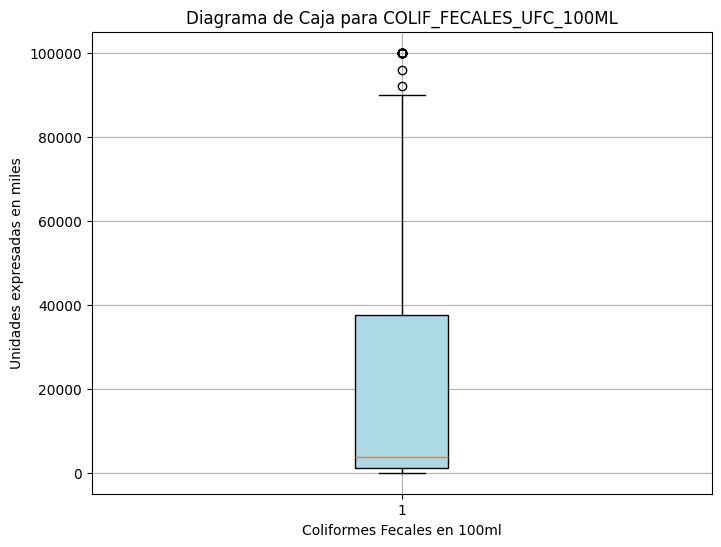

In [ ]:
# Vemos el boxplot nuevamente
plt.figure(figsize=(8, 6))
plt.boxplot(copy_dataset['colif_fecales_ufc_100ml'].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title('Diagrama de Caja para COLIF_FECALES_UFC_100ML')
plt.xlabel('Coliformes Fecales en 100ml')
plt.ylabel('Unidades expresadas en miles')
plt.grid(True)
plt.show()

Se ve mas lindo ahora... seguimos con otro indicador.

Miremos "DQO_MG_L", que indica la cantidad total de materia orgánica en el agua que puede ser oxidada por medios químicos

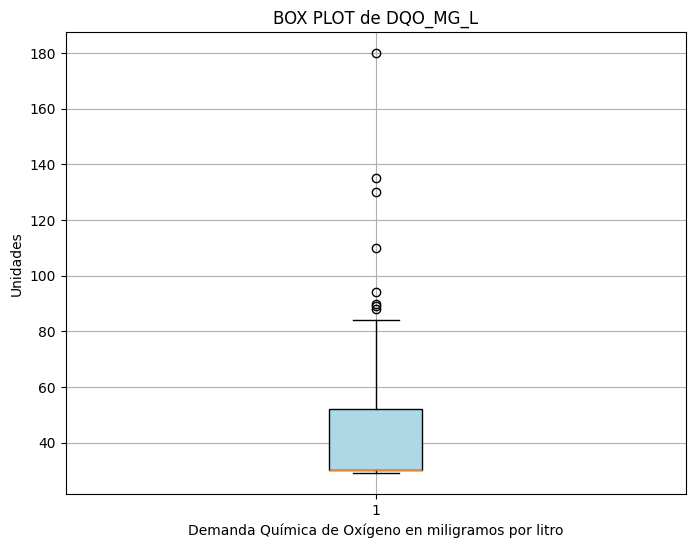

In [ ]:
# Vemos el boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(copy_dataset['dqo_mg_l'].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title('BOX PLOT de DQO_MG_L')
plt.xlabel('Demanda Química de Oxígeno en miligramos por litro')
plt.ylabel('Unidades')
plt.grid(True)
plt.show()

Con ayuda del describe y el Box Plot, observamos que hasta el Q3 acumula un total de 50 mg/L, osea hasta el 75%. Hay ciertas zonas donde este indicador es bastante alto y estan alejados del resto de la distribucion, siendo el valor maximo 180 mg/L. Sin embargo, esta dentro de los intervalos posibles que puede tomar este indicador. Utilizaremos una transformación logarítmica (log base 10) para reducir la magnitud de los valores extremadamente grandes (outliers). Esto es útil para manejar distribuciones sesgadas y mejorar la normalidad de los datos.


In [ ]:
# Calcular el IQR (Rango Intercuartílico) para detectar outliers
Q1 = copy_dataset['dqo_mg_l'].quantile(0.25)  # Primer cuartil
Q3 = copy_dataset['dqo_mg_l'].quantile(0.75)  # Tercer cuartil
IQR = Q3 - Q1  # Rango intercuartílico

# Definir el límite superior para los outliers
limite_superior = Q3 + 1.5 * IQR

# Reemplazar los outliers por la transformación logarítmica
copy_dataset['dqo_mg_l'] = copy_dataset['dqo_mg_l'].apply(
    lambda x: np.log10(x) if x > limite_superior and x > 0 else x
)

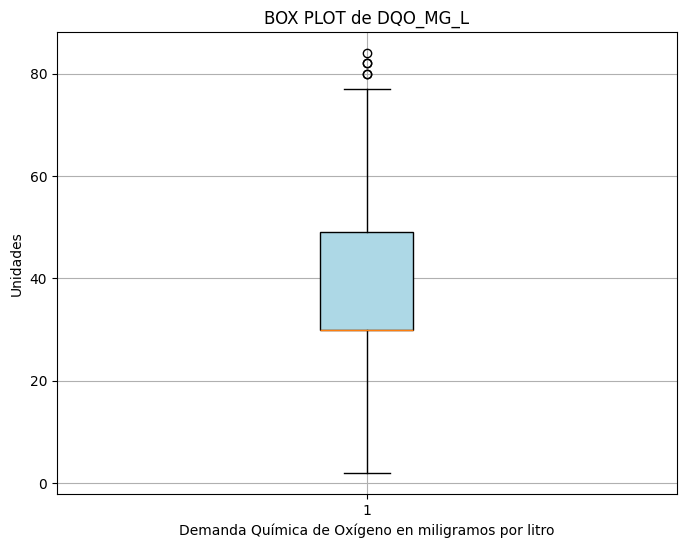

In [ ]:
# Vemos el boxplot nuevamente
plt.figure(figsize=(8, 6))
plt.boxplot(copy_dataset['dqo_mg_l'].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title('BOX PLOT de DQO_MG_L')
plt.xlabel('Demanda Química de Oxígeno en miligramos por litro')
plt.ylabel('Unidades')
plt.grid(True)
plt.show()

Ahora se aprecia mejor, continuemos..

Examinemos la Turbiedad en el agua mediante un histograma

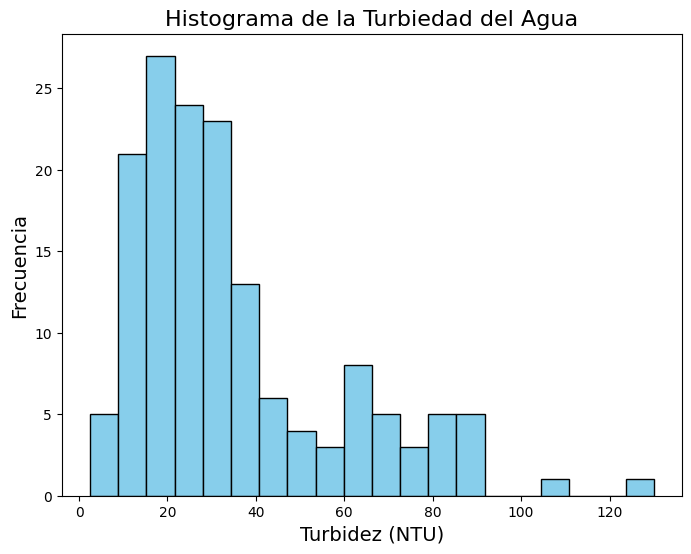

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(copy_dataset['turbiedad_ntu'], bins=20, color='skyblue', edgecolor='black')

# Títulos y etiquetas
plt.title('Histograma de la Turbiedad del Agua', fontsize=16)
plt.xlabel('Turbidez (NTU)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

Vemos que la mayoria de los datos de distribuyen entre 15 y 30 NTU. Una turbiedad mayor a 100 NTU podría ser señal de contaminación por materiales suspendidos, sedimentos o contaminación industrial, por lo que podria ser posible para zonas directamente afectadas por el humano o intensas lluvias. 

No eliminaremos ni reemplazaremos ningun valor extremo, ya que esos 2 lugares que superan los 100 NTU podrian ser lugares que realmente estan siendo afectados, y no un error en la medicion de los datos.


A ver que pasa con el indicador "CR_TOTAL_MG_L", La concentración de cromo en el agua (cromo es un metal pesado que puede ser tóxico para los seres humanos y los ecosistemas acuáticos)

In [ ]:
copy_dataset["cr_total_mg_l"].value_counts()

cr_total_mg_l
0.005     118
0.007       5
6.000       4
0.006       3
5.000       3
0.011       2
0.006       2
7.000       2
0.009       1
0.010       1
0.006       1
0.015       1
0.020       1
0.009       1
0.008       1
0.007       1
0.005       1
0.008       1
0.008       1
0.006       1
12.000      1
8.000       1
10.000      1
Name: count, dtype: int64

Observamos que el valor mas frecuente es 0.005 mg/L. Relativamente bajo en comparación con los límites de seguridad establecidos para el agua potable, lo que indicaría que no es una concentración peligrosa desde el punto de vista de la salud humana.

Tambien notamos una gran diferencia de rangos, por un lado 0.005 y por otro lado 12. 

En el contexto del Río de la Plata, donde el cromo puede estar presente debido a actividades industriales, valores como 0.5 mg/L aún se considerarían elevados

Reemplazemos aquellas ocurrencias mayores a 0.5, por este valor para intentar acomodar un poco los rangos.

In [ ]:
# Reemplazar los valores mayores a 0.5 mg/L, por 0.5.
copy_dataset['cr_total_mg_l'] = copy_dataset['cr_total_mg_l'].apply(lambda x: 0.5 if x > 0.5 else x)

In [ ]:
copy_dataset["cr_total_mg_l"].value_counts()

cr_total_mg_l
0.005    118
0.500     12
0.007      5
0.006      3
0.011      2
0.006      2
0.006      1
0.015      1
0.009      1
0.010      1
0.020      1
0.008      1
0.009      1
0.005      1
0.007      1
0.008      1
0.008      1
0.006      1
Name: count, dtype: int64

ahora si... prosigamos.

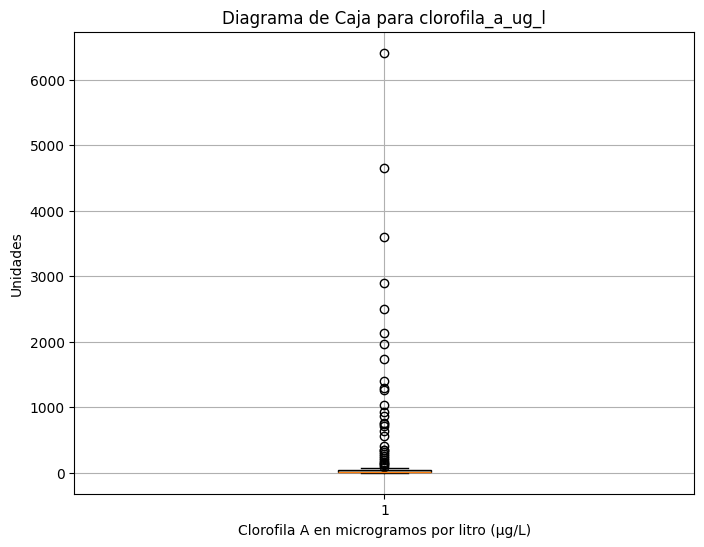

In [ ]:
plt.figure(figsize=(8, 6))

# Creamos BOXPLOT para ver como se distribuyen los datos
plt.boxplot(copy_dataset['clorofila_a_ug_l'].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))

plt.title('Diagrama de Caja para clorofila_a_ug_l')
plt.xlabel('Clorofila A en microgramos por litro (µg/L)')
plt.ylabel('Unidades')
plt.grid(True)
plt.show()

el BOX PLOT denota una distribucion sesgada a derecha, hay extremos demasiados altos. El maximo es aprox 6000 ug/L

Muy alto (>50 µg/L): Eutrofización grave, posible floración algal, agua no apta para consumo o recreación sin tratamiento.

Reemplazemos aquellos valores mayores a 100 ug/l por 100 ug/l, lo que seguira representando un valor alto para este indicador segun las fuentes

In [ ]:
# Reemplazar los valores mayores a 100 por 100 en la columna 'clorofila_a_ug_l'

copy_dataset['clorofila_a_ug_l'] = copy_dataset['clorofila_a_ug_l'].apply(
    lambda x: 100 if x > 100 else x
)

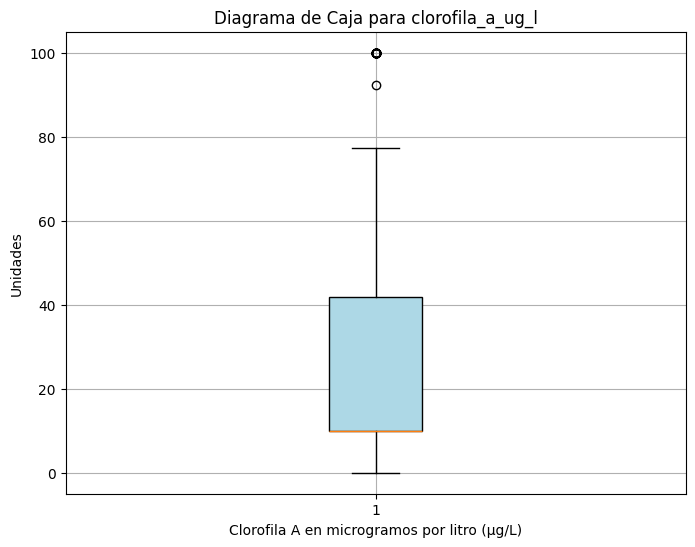

In [ ]:
plt.figure(figsize=(8, 6))

# Creamos BOXPLOT para ver como se distribuyen los datos
plt.boxplot(copy_dataset['clorofila_a_ug_l'].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))

plt.title('Diagrama de Caja para clorofila_a_ug_l')
plt.xlabel('Clorofila A en microgramos por litro (µg/L)')
plt.ylabel('Unidades')
plt.grid(True)
plt.show()

ahora se ve mejor... empezemos a desarrollar alguna posible hipotesis

Una manera de resumir todas las posibles relaciones es construyendo una matriz de correlación, donde presentemos todos los valores de correlación entre todos los posibles pares de variables.

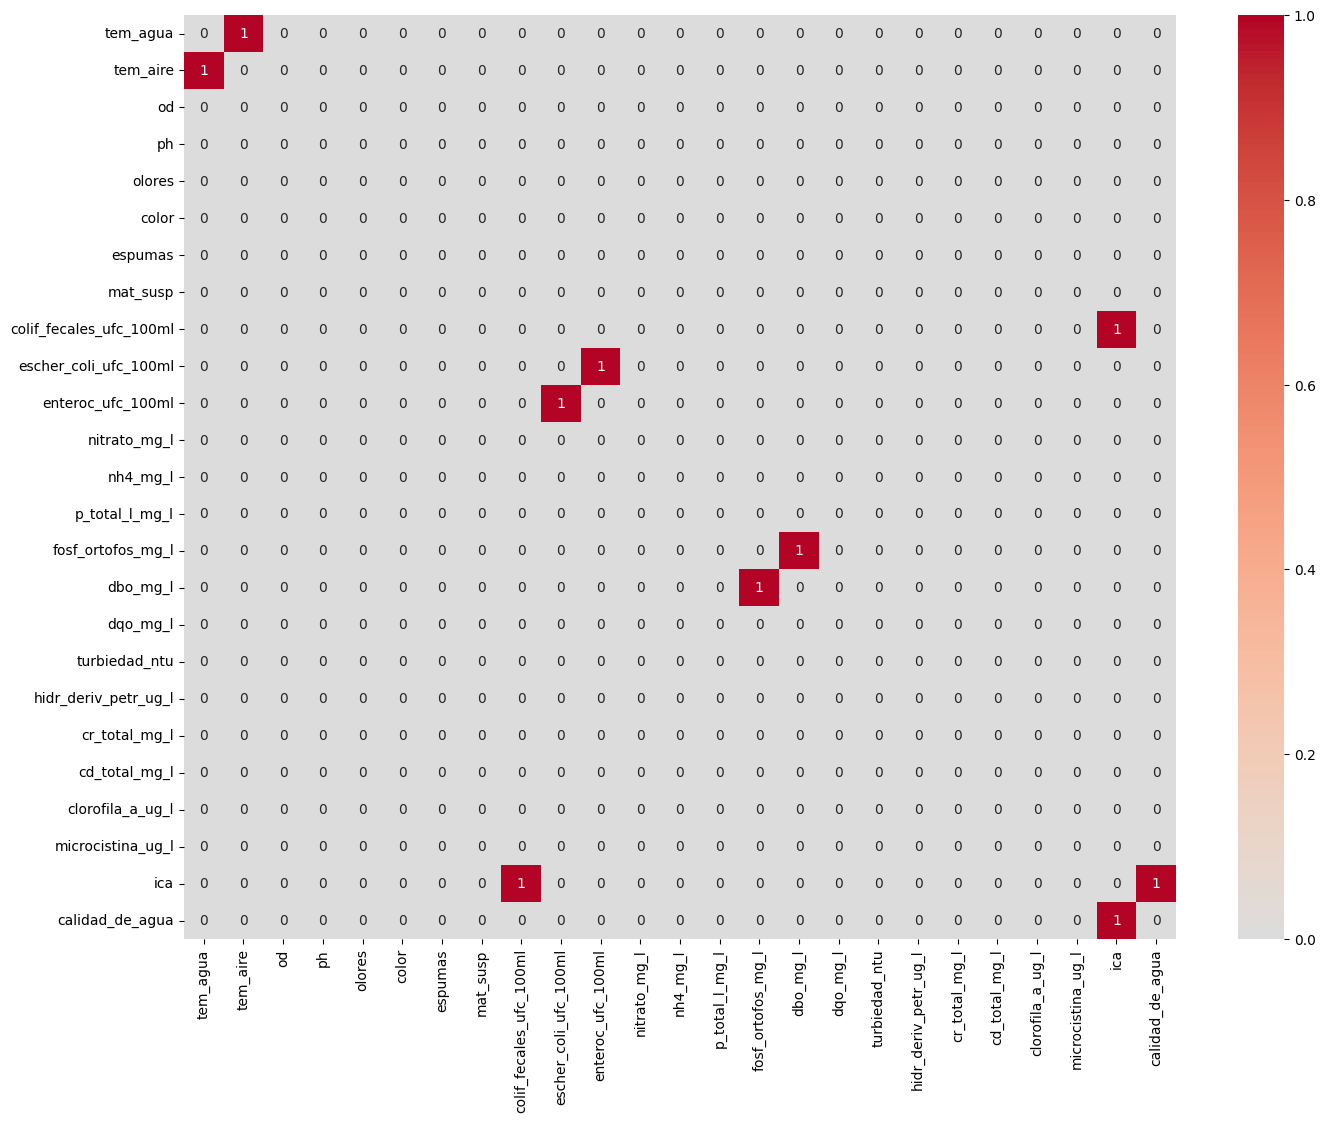

In [ ]:
correlation_matrix = copy_dataset.corr(numeric_only=True)
# tomamos el valor absoluto de las correlaciones, umbralamos las mayores a 0.6
correlation_matrix_umbralizada = correlation_matrix.abs() > 0.6
# aprovechamos y sacamos la diagonal
np.fill_diagonal(correlation_matrix_umbralizada.values, 0)

# e imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12));
sns.heatmap(correlation_matrix_umbralizada, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

Encontramos las siguientes potenciales relaciones lineales: 
- temperatura del agua y temperatura del aire: Esta no nos aporta nada interesante.
- ICA y colif_fecales_ufc_100ml: Calidad del agua vs contaminacion fecal de coliflores.
- enteroc_ufc_100ml y escher_coli_ufc_100ml: indicadores microbiológicos que reflejan la contaminación fecal en muestras de agua. Cada uno representa un grupo diferente de bacterias.
- dbo_mg_l y fosf_ortofos_mg_l: Altos niveles de fosfatos suelen estar correlacionados con un aumento de la materia orgánica disponible, lo que incrementa la DBO. Sin embargo, la relación no siempre es lineal, ya que la DBO también depende de otros factores
- ICA y calidad del agua: no nos aporta informacion valiosa. es comun pensar una relacion entre ellos

Ahora analicemos una a una, utilizando un scatter plot:

primero el ICA vs COLIF_FECALES_UFC_100ML. Aplicamos normalizacion min-max para ajustar escala y grafiquemos un scatter plot

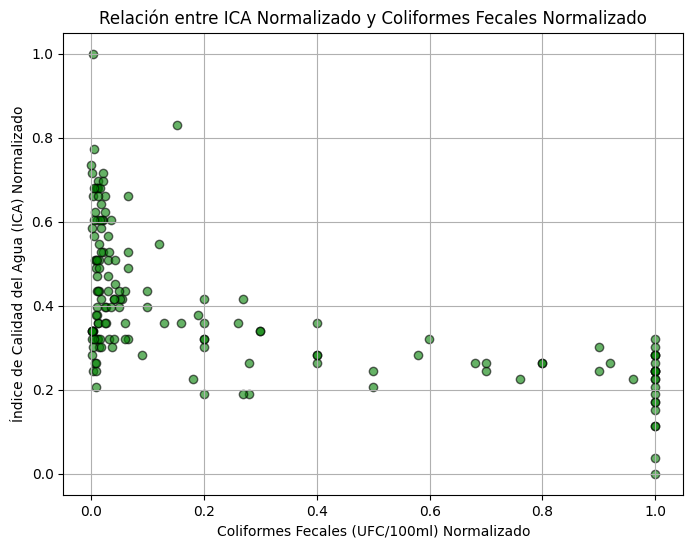

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Crear el objeto de normalización
scaler = MinMaxScaler()

# Normalizar las columnas
copy_dataset['ica_normalizado'] = scaler.fit_transform(copy_dataset[['ica']])
copy_dataset['colif_fecales_normalizado'] = scaler.fit_transform(copy_dataset[['colif_fecales_ufc_100ml']])

# Crear scatter plot con datos normalizados
plt.figure(figsize=(8, 6))
plt.scatter(copy_dataset['colif_fecales_normalizado'], copy_dataset['ica_normalizado'], alpha=0.6, c='green', edgecolors='k')
plt.title('Relación entre ICA Normalizado y Coliformes Fecales Normalizado')
plt.xlabel('Coliformes Fecales (UFC/100ml) Normalizado')
plt.ylabel('Índice de Calidad del Agua (ICA) Normalizado')
plt.grid(True)
plt.show()

se ve cierta tendencia a que a valores mas altos del "indice de calidad de agua", valores mas bajos de coliformes fecales. Sin embargo, la correlacion no es tan significativa y los datos estan bastante dispersos, no podemos asegurar una relacion lineal.

Veremos que pasa con "dbo_mg_l" vs "fosf_ortofos_mg_l"

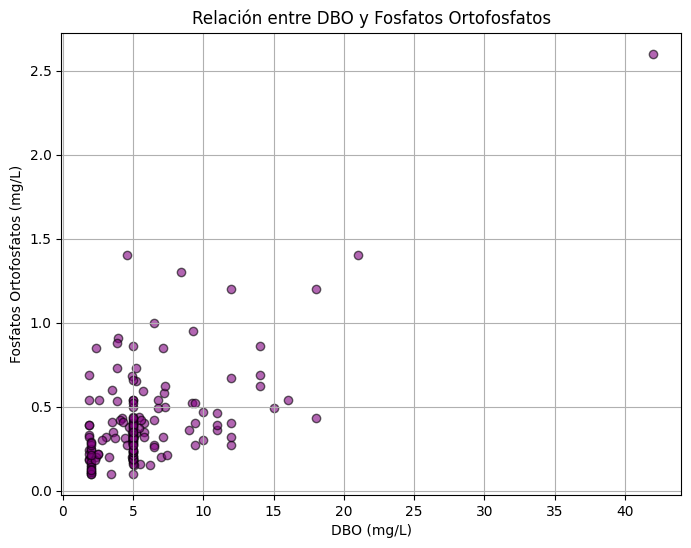

In [ ]:
# Crear scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(copy_dataset['dbo_mg_l'], copy_dataset['fosf_ortofos_mg_l'], alpha=0.6, c='purple', edgecolors='k')
plt.title('Relación entre DBO y Fosfatos Ortofosfatos')
plt.xlabel('DBO (mg/L)')
plt.ylabel('Fosfatos Ortofosfatos (mg/L)')
plt.grid(True)
plt.show()

In [ ]:
#examinamos que valor arrojo el coeficiente de correlacion
correlacion = copy_dataset[['dbo_mg_l', 'fosf_ortofos_mg_l']].corr()
print("Correlación entre DBO y Fosfatos Ortofosfatos:")
print(correlacion)

Correlación entre DBO y Fosfatos Ortofosfatos:
                   dbo_mg_l  fosf_ortofos_mg_l
dbo_mg_l              1.000              0.660
fosf_ortofos_mg_l     0.660              1.000


No podemos asumir una relacion lineal clara, ya que se puede notar cierta tendencia ascendente pero los datos siguen bastante dispersos

Como del heapmap no pudimos extraer algo solido, nos centraremos en principio en el ICA (Indice de Calidad del Agua) ya que es una medida utilizada para evaluar la calidad general del agua de manera sencilla, basándose en varios parámetros como la concentración de contaminantes, la turbidez, la oxigenación, el pH, entre otros

Veamos en el siguiente histograma, como se distribuyen los diferentes valores del ICA en todas las observaciones

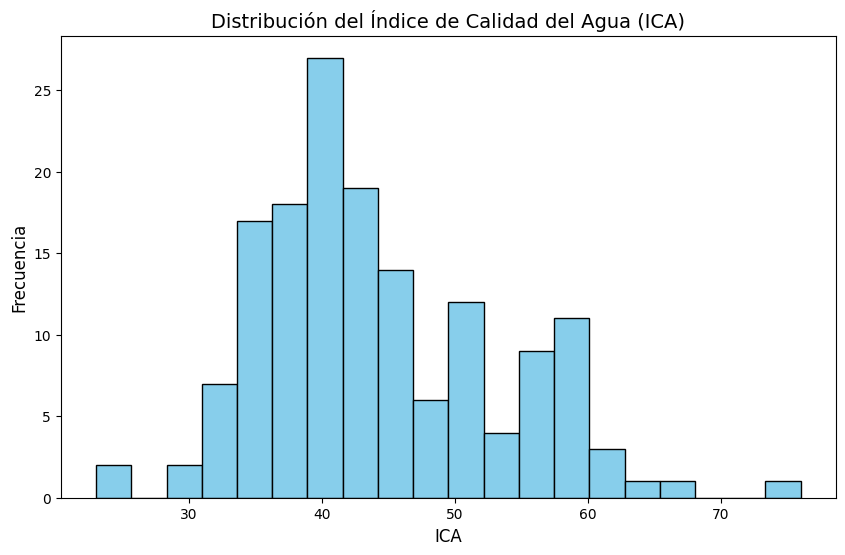

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(copy_dataset['ica'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución del Índice de Calidad del Agua (ICA)', fontsize=14)
plt.xlabel('ICA', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

En el grafico vemos que los valores que mas se repiten de ICA oscilan entre 35 y 45 (siendo 40 el que mas se repite) lo que indicaria una prevalencia de media a baja calidad de agua. Tambien se observa que hay 2 valores que se alejan bastante de los demas, uno mayor a 70 y el otro menor a 30.


En principio, uno pensaria que el ICA deberia de ser peor en condiciones climaticas de mayor temperatura, osea valores mas bajos, ya que la temperatura del agua se eleva y trae consigo ciertos fenomenos como la elevacion de los niveles de contaminantes orgánicos, la reduccion de la cantidad de oxígeno disuelto en el agua o incluso el aumento de los niveles de clorofila, afectando los valores de turbidez.

Esto podria ser tomado como una primera hipotesis inicial, en la que comprobaremos si el ICA en Verano, es peor que en las otras estaciones, debido al aumento de precipitaciones, humedad, mas calor, etc. ¿Sera asi?

Examinaremos los valores del ICA para las 4 campañas o fechas del dataset, que corresponden a las 4 estaciones del año: Verano, Otoño, Invierno y Primavera

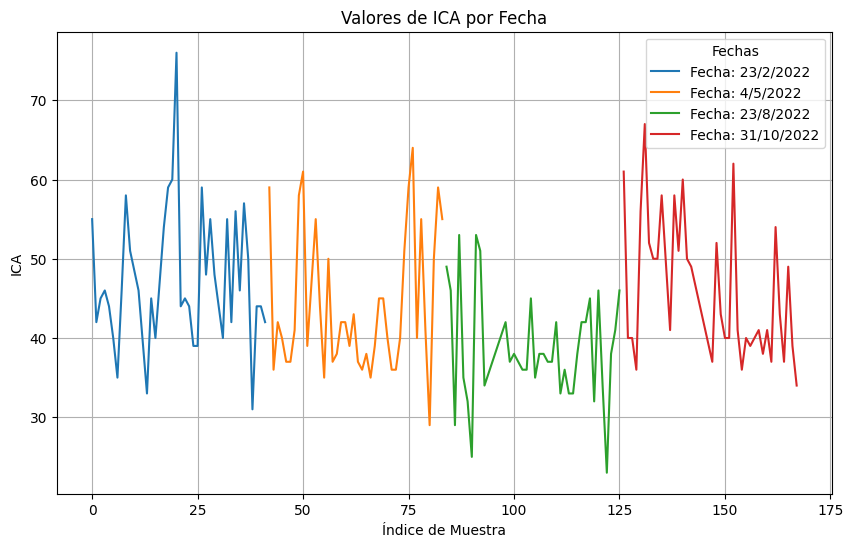

In [ ]:
plt.figure(figsize=(10, 6))
# iteracion donde por cada una de las 4 fechas de muestreo, muestra la variacion del ICA
for fecha in copy_dataset['fecha'].unique():
    data_fecha = copy_dataset[copy_dataset['fecha'] == fecha]
    plt.plot(data_fecha['ica'], label=f'Fecha: {fecha}')

plt.xlabel('Índice de Muestra')
plt.ylabel('ICA')
plt.grid(True)
plt.legend(title='Fechas')
plt.title('Valores de ICA por Fecha')
plt.show()

Podemos observar, que hay una tendencia de menores niveles de ICA en la campaña "Invierno" (23/08/2022). Los 3 valores mas chicos que toma este indicador, estan presentes en esta estacion por alguna razon, lo que parece extraño, porque en inicio creiamos lo opuesto. Ademas en verano vemos un pico bastante alto que podria ser un error de medicion o alguna zona en la que raramente ese valor es muy alto.

In [ ]:
# Ajustes para que se muestren todas las filas y columnas sin truncamiento
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

LA SIGUIENTE FUNCION, OPERA POR CADA OBSERVACION DEL DATASET, AGREGANDO A LA LISTA "INDICES_FILTRADOS" AQUELLAS MUESTRAS HECHAS EN INVIERNO DONDE EL "ICA" SEA MENOR EN COMPARACION CON LAS OTRAS 3 CAMPAÑAS, PARA ESA MISMA OBSERVACION.

In [ ]:
def filtrar_ica_minimo(df):
    # Inicializar una lista para guardar los índices de las filas que cumplen la condición
    indices_filtrados = []
    
    # Iterar sobre las filas de la campaña "invierno"
    for idx, row in df[df['campaña'] == 'invierno'].iterrows():
        # Obtener el valor de ICA para la fila actual
        ica_invierno = row['ica']
        
        # Filtrar las filas con la misma observación en otras campañas
        otras_campañas = df[(df['sitios'] == row['sitios']) & (df['campaña'] != 'invierno')]
        
        # Obtener el valor mínimo de ICA de las otras campañas
        min_ica_otra_campaña = otras_campañas['ica'].min()
        
        # Si el ICA en invierno es menor que el mínimo de las otras campañas, agregar el índice a la lista
        if ica_invierno < min_ica_otra_campaña:
            indices_filtrados.append(idx)
    
    # Devolver el indice de las filas filtradas
    return indices_filtrados

# Llamar a la función con la copia del dataset
resultado = filtrar_ica_minimo(copy_dataset)

print(resultado)

[84, 86, 88, 89, 90, 93, 98, 102, 103, 105, 109, 110, 111, 113, 114, 115, 119, 120, 121, 122, 123]


VEMOS QUE 21 de 37 muestras totales hechas en invierno, el "ICA" es mas bajo en comparacion a las demas estaciones. un 56% lo que es bastante peculiar

Procederemos a ver en que sitios el ICA es mas bajo para la campaña invierno

In [ ]:
copy_dataset[copy_dataset['campaña'] == 'invierno'].nsmallest(5, 'ica')

,sitios,codigo,fecha,campaña,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua,ica_normalizado,colif_fecales_normalizado
122,Diagonal 66 (descarga cloaca),BS095,23/8/2022,invierno,11.000,14.000,8.050,8.130,1,1,1,1,100000.000,440.000,30.000,2.100,19.000,1.400,1.400,21.000,30.000,11.000,0.100,0.005,0.001,100.000,0.150,23,3,0.000,1.000
90,Río Lujan y Canal San Fernando,TI007,23/8/2022,invierno,16.500,15.000,1.130,7.120,1,1,0,0,100000.000,90.000,9.000,11.700,9.300,0.860,0.860,14.000,30.000,20.500,0.100,0.500,0.001,10.000,0.150,25,3,0.038,1.000
86,Canal Aliviador y Río Lujan,TI002,23/8/2022,invierno,14.400,14.000,0.450,7.140,1,0,0,0,100000.000,186.000,11.000,11.700,23.000,2.800,2.600,42.000,75.000,13.000,0.100,0.009,0.001,10.000,0.150,29,3,0.113,1.000
89,Rio Tigre 100m antes del Rio Luján,TI005,23/8/2022,invierno,14.300,13.000,0.360,6.880,0,0,0,1,100000.000,560.000,27.000,2.000,22.000,1.900,0.280,2.000,30.000,33.000,0.200,0.011,0.001,10.000,0.150,32,3,0.170,1.000
119,Arroyo El Gato,EN083,23/8/2022,invierno,12.800,9.000,2.490,8.010,0,0,0,0,100000.000,60.000,24.000,2.000,22.000,1.200,1.200,18.000,30.000,20.500,0.100,0.005,0.001,100.000,0.150,32,3,0.170,1.000


- El ICA oscila entre 23 y 32, lo que es muy bajo.
- En todas la calidad del agua esta extremadamente deteriorada.
- En las primeras 2 observaciones hay presencia de olores y colores en el agua.
- La turbidez en todos los casos es mayor a 11, lo que es un peligroso para la salud.
- Para la 2da observacion la concentracion total de cromo es elevadisima.

Examinemos el sitio para el cual el ICA es mas bajo, "Diagonal 66 (descarga cloaca)", para las 4 campañas diferentes

In [ ]:
#buscamos las 4 observaciones del mismo sitio
copy_dataset[copy_dataset['sitios'] == 'Diagonal 66 (descarga cloaca)']

,sitios,codigo,fecha,campaña,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua,ica_normalizado,colif_fecales_normalizado
38,Diagonal 66 (descarga cloaca),BS095,23/2/2022,Verano,20.000,18.000,6.560,8.110,1,1,1,1,100000.000,2800.000,20000.000,2.000,0.049,1.500,1.300,8.400,29.000,4.100,0.100,0.005,0.001,10.000,0.200,31,3,0.151,1.000
80,Diagonal 66 (descarga cloaca),BS095,4/5/2022,otoño,8.000,12.000,7.200,7.990,1,1,1,1,100000.000,150000.000,28000.000,8.100,8.500,1.200,0.850,7.100,66.000,3.300,0.100,0.005,0.001,10.000,0.150,29,3,0.113,1.000
122,Diagonal 66 (descarga cloaca),BS095,23/8/2022,invierno,11.000,14.000,8.050,8.130,1,1,1,1,100000.000,440.000,30.000,2.100,19.000,1.400,1.400,21.000,30.000,11.000,0.100,0.005,0.001,100.000,0.150,23,3,0.000,1.000
164,Diagonal 66 (descarga cloaca),BS095,31/10/2022,Primavera,10.000,12.000,7.210,7.000,0,1,0,1,80000.000,80000.000,12000.000,5.200,1.200,30.120,0.390,5.000,31.000,18.200,0.100,0.005,0.001,20.200,0.150,37,3,0.264,0.800


Para las 4 campañas, el valor mas bajo de ICA para este lugar en concreto, es en invierno. Veremos que atributos son los mas impactantes para esta campaña a ver si podemos deducir algo.
Se ve que es un lugar bastante contaminado ya que cuenta con la presencia de olor, color, espuma y materia suspendida en el agua, pero ¿Por que el ICA nos da mas bajo en invierno¿ ¿Sera que en esta estacion ocurre algo en la zona que provoca esta anomalia? de verificar esto, no olvidar que 21 de 37 muestras dieron un indice de calidad de agua menor en invierno que en las otras estaciones, un 56%, lo que probablemente signifique que pueda haber una relacion entre el ICA y las temperaturas mas bajas, para este dataset

Verificaremos si hay una relacion entre las temperaturas y el ICA.
Cálculo del p-valor para las correlaciones entre "tem_agua" y "ICA", y entre "tem_aire" y "ICA":

In [ ]:
# Normalizamos mediante el metodo MIN-MAX
copy_dataset['tem_agua_norm'] = (copy_dataset['tem_agua'] - copy_dataset['tem_agua'].min()) / (copy_dataset['tem_agua'].max() - copy_dataset['tem_agua'].min())
copy_dataset['tem_aire_norm'] = (copy_dataset['tem_aire'] - copy_dataset['tem_aire'].min()) / (copy_dataset['tem_aire'].max() - copy_dataset['tem_aire'].min())
copy_dataset['ica_norm'] = (copy_dataset['ica'] - copy_dataset['ica'].min()) / (copy_dataset['ica'].max() - copy_dataset['ica'].min())

# Correlación y p-valor entre "tem_agua" y "ICA"
corr_tem_agua_ica, p_val_agua_ica = pearsonr(copy_dataset['tem_agua_norm'], copy_dataset['ica_norm'])
print(f"Correlación entre Temperatura del Agua y ICA: {corr_tem_agua_ica}")
print(f"P-valor entre Temperatura del Agua y ICA: {p_val_agua_ica}")

Correlación entre Temperatura del Agua y ICA: 0.2714883695794689
P-valor entre Temperatura del Agua y ICA: 0.0006596309209046694


Aunque la correlación es baja, la relación entre la temperatura del agua y el ICA es significativa desde el punto de vista estadístico, el P-valor arroja un resultado menor a 0.05. Sin embargo, dado que el coeficiente de correlación es débil, puede ser útil investigar si otros factores están afectando el ICA y si hay interacciones entre las variables involucradas.

In [ ]:
# definicion de datasets y variables a trabajar 

invierno = copy_dataset[copy_dataset['campaña'] == 'invierno']
verano = copy_dataset[copy_dataset['campaña'] == 'Verano']

variables = [ "turbiedad_ntu", "color", "olores", "mat_susp", "espumas",
             "tem_agua", "tem_aire",
             "od", "ph",  'escher_coli_ufc_100ml',
             'colif_fecales_ufc_100ml',
            "enteroc_ufc_100ml", "nh4_mg_l", "p_total_l_mg_l", 
            "fosf_ortofos_mg_l", "dbo_mg_l", 'dqo_mg_l', "cr_total_mg_l",
            'hidr_deriv_petr_ug_l',  'clorofila_a_ug_l', 'microcistina_ug_l']

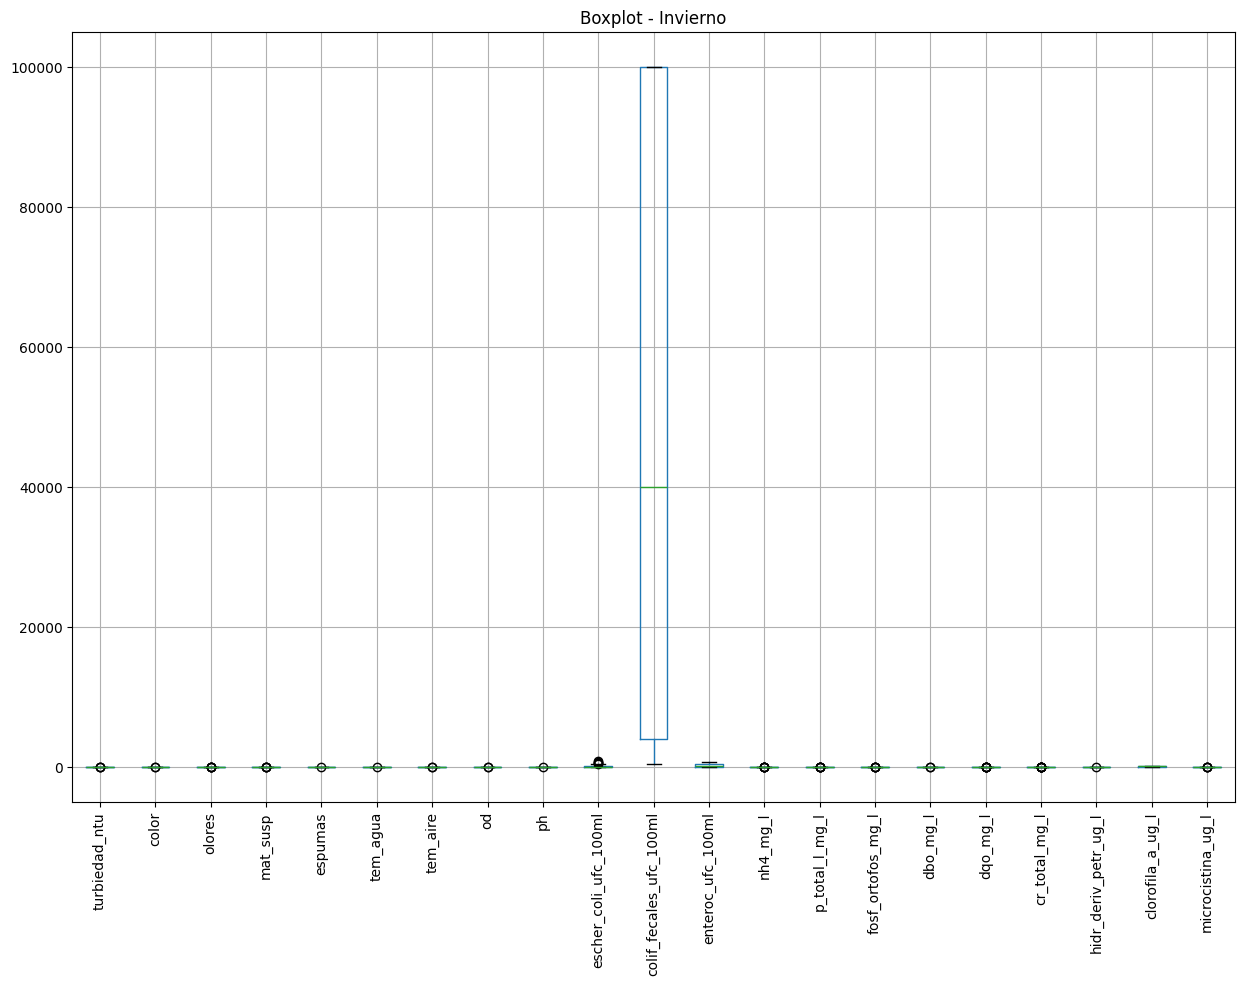

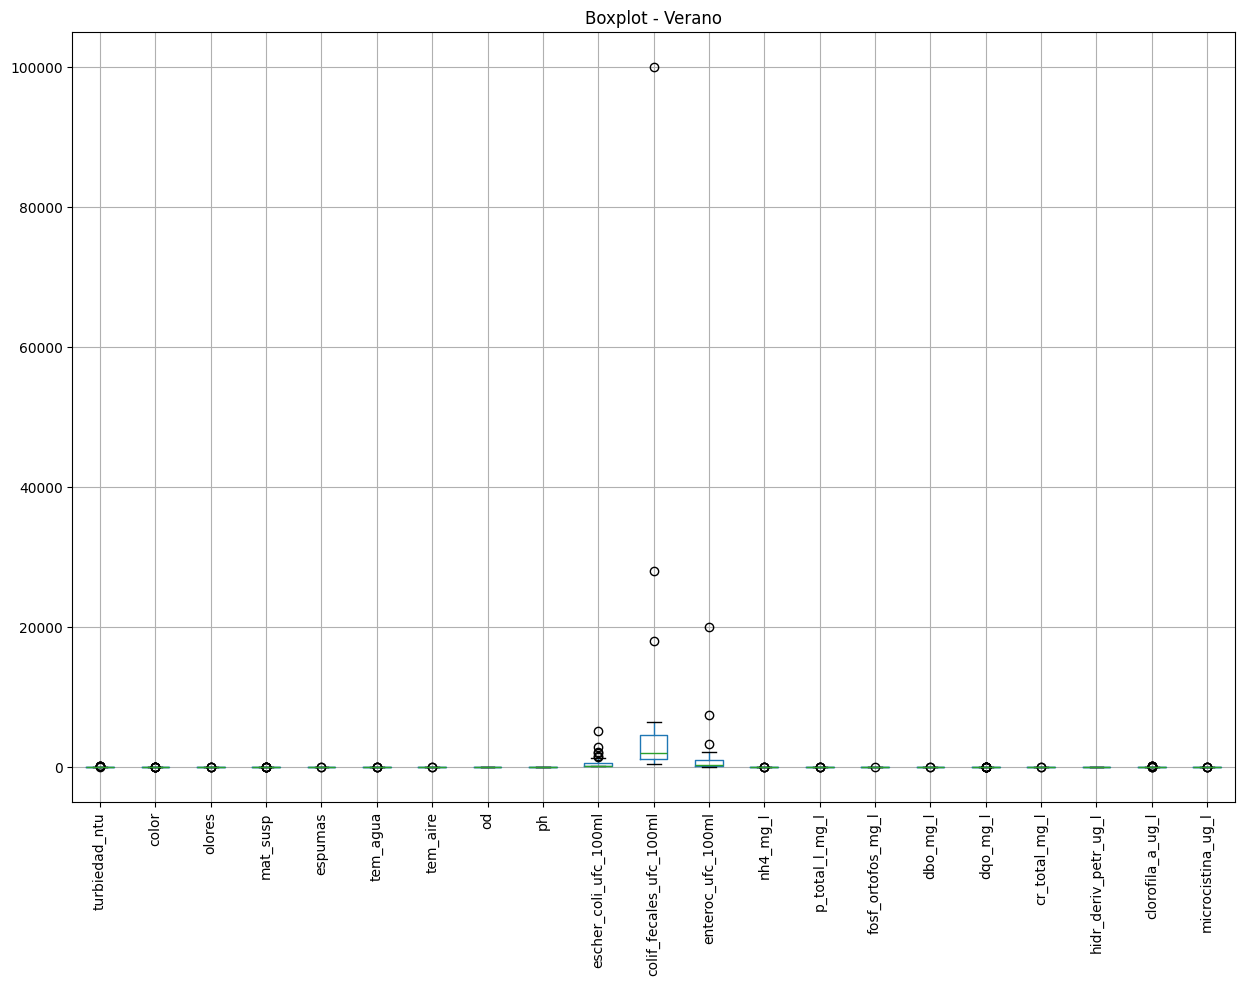

In [ ]:
# graficamos para ver los outliers

# BOXPLOT Invierno - para ver outliers
plt.figure(figsize=(15, 10))
invierno[variables].boxplot(rot=90)
plt.title('Boxplot - Invierno')
plt.show()

# BOXPLOT Verano - para ver outliers
plt.figure(figsize=(15, 10))
verano[variables].boxplot(rot=90)
plt.title('Boxplot - Verano')
plt.show()

Vemos que los outliers mas extremos estan en los indicadores de contaminacion fecal, aplicaremos transformacion logaritmica en estos 3 para equilibrar la distribucion

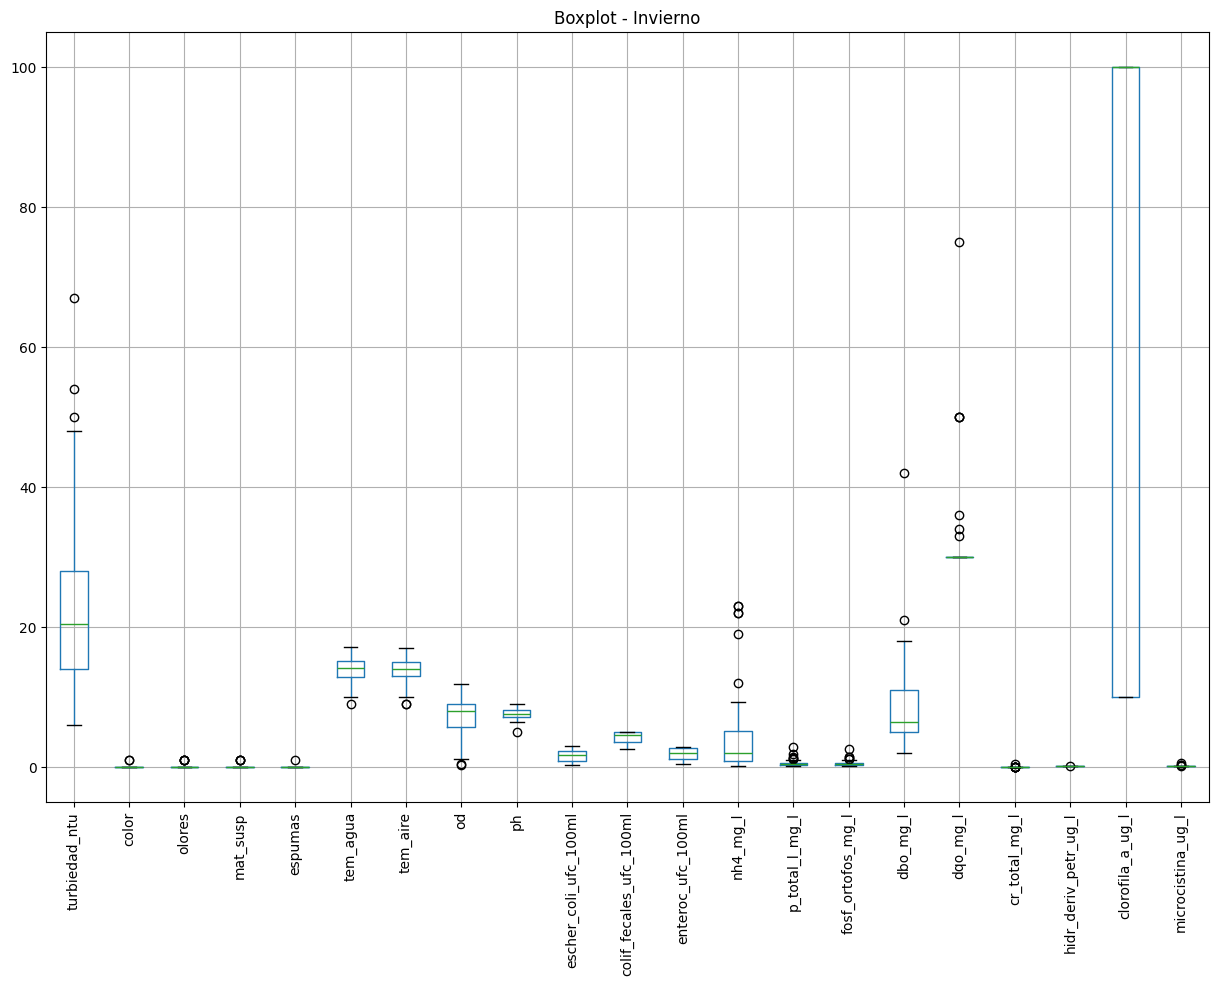

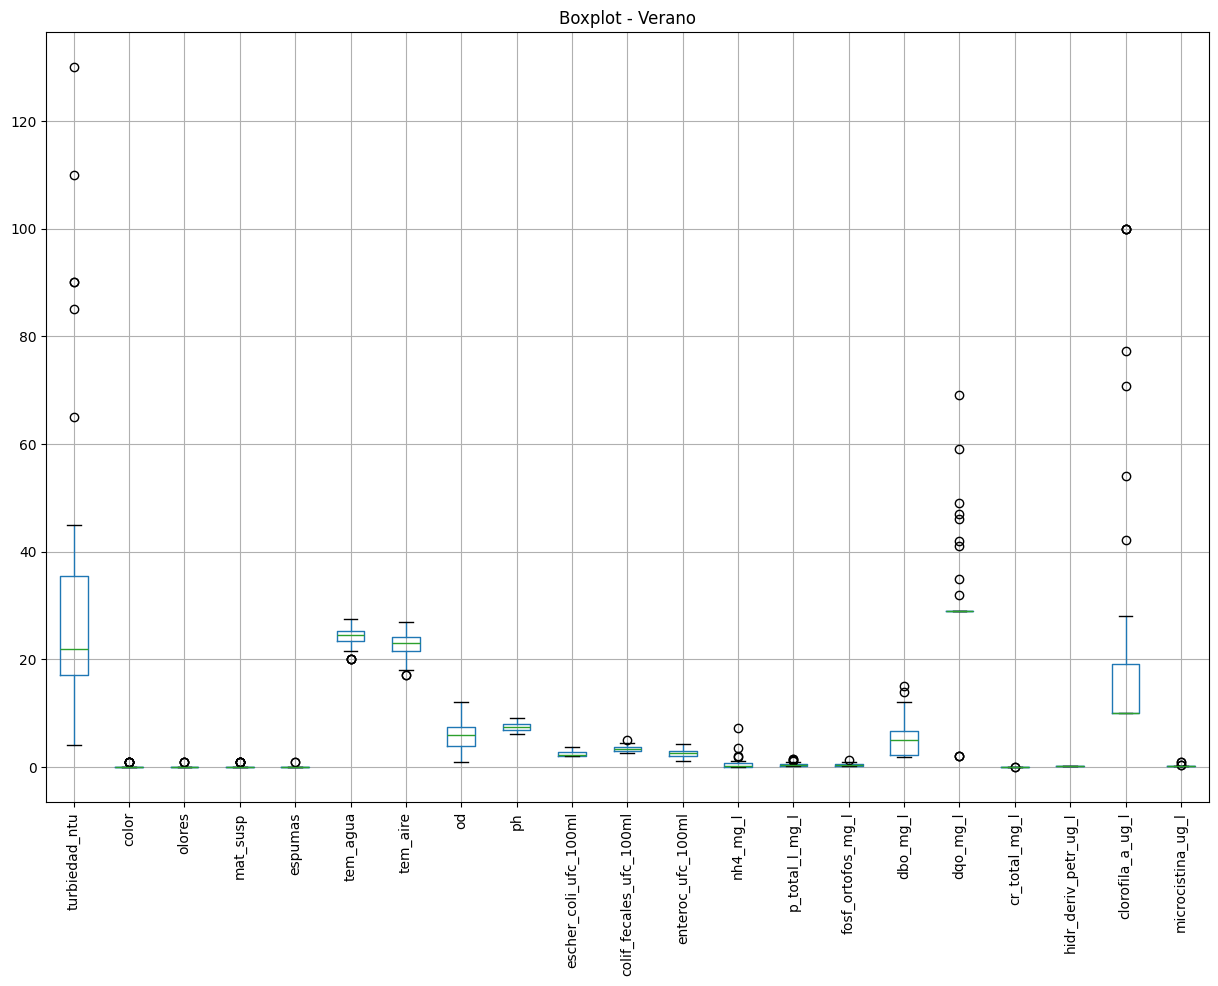

In [ ]:
# Aplicar logaritmo base 10 con ajuste
copy_dataset['colif_fecales_ufc_100ml'] = np.log10(copy_dataset['colif_fecales_ufc_100ml'] + 1)
copy_dataset['escher_coli_ufc_100ml'] = np.log10(copy_dataset['escher_coli_ufc_100ml'] + 1)
copy_dataset['enteroc_ufc_100ml'] = np.log10(copy_dataset['enteroc_ufc_100ml'] + 1)

#hago lo mismo que antes

# definicion de datasets y variables a trabajar 

invierno = copy_dataset[copy_dataset['campaña'] == 'invierno']
verano = copy_dataset[copy_dataset['campaña'] == 'Verano']

variables = [ "turbiedad_ntu", "color", "olores", "mat_susp", "espumas",
             "tem_agua", "tem_aire",
             "od", "ph",  'escher_coli_ufc_100ml',
             'colif_fecales_ufc_100ml',
            "enteroc_ufc_100ml", "nh4_mg_l", "p_total_l_mg_l", 
            "fosf_ortofos_mg_l", "dbo_mg_l", 'dqo_mg_l', "cr_total_mg_l",
            'hidr_deriv_petr_ug_l',  'clorofila_a_ug_l', 'microcistina_ug_l']

# BOXPLOT Invierno - para ver outliers
plt.figure(figsize=(15, 10))
invierno[variables].boxplot(rot=90)
plt.title('Boxplot - Invierno')
plt.show()

# BOXPLOT Verano - para ver outliers
plt.figure(figsize=(15, 10))
verano[variables].boxplot(rot=90)
plt.title('Boxplot - Verano')
plt.show()

ahora si.

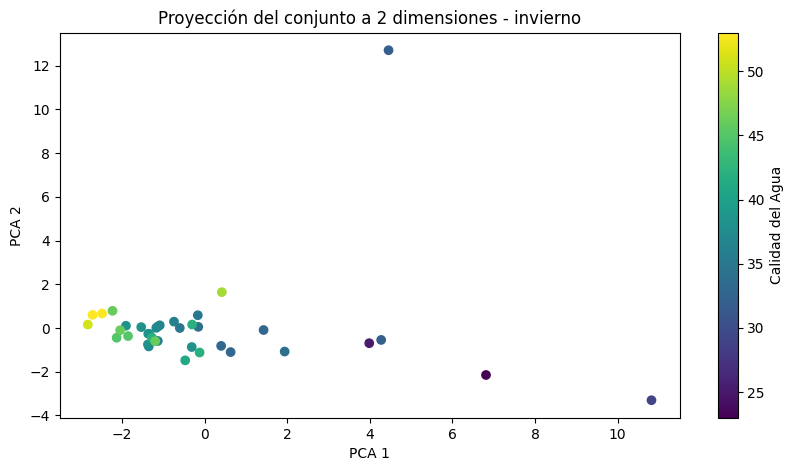

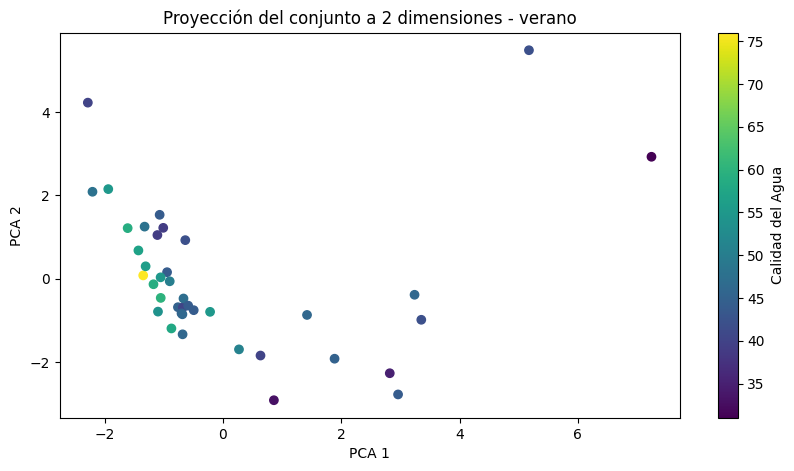

Varianza explicada por los componentes principales (invierno): [0.32972164 0.22199463]
Varianza explicada por los componentes principales (verano): [0.27511629 0.19609191]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# PCA para ambas estaciones
variables = [ "turbiedad_ntu", "color", "olores", "mat_susp", "espumas",
             "tem_agua", "tem_aire",
             "od", "ph",  'escher_coli_ufc_100ml',
             'colif_fecales_ufc_100ml',
            "enteroc_ufc_100ml", "nh4_mg_l", "p_total_l_mg_l", 
            "fosf_ortofos_mg_l", "dbo_mg_l", 'dqo_mg_l', "cr_total_mg_l",
            'hidr_deriv_petr_ug_l',  'clorofila_a_ug_l', 'microcistina_ug_l']

# Separar dataset
X_invierno = invierno[variables]
X_verano = verano[variables]

scaler = StandardScaler()
scaler.fit(copy_dataset[variables])  # Ajustar en todo el conjunto
X_invierno_scaled = scaler.transform(X_invierno)
X_verano_scaled = scaler.transform(X_verano)

# PCA para invierno
pca_invierno = PCA(n_components=2)
principal_invierno = pca_invierno.fit_transform(X_invierno_scaled)

# PCA para verano
pca_verano = PCA(n_components=2)
principal_verano = pca_verano.fit_transform(X_verano_scaled)


# Scatter plot para invierno
plt.figure(figsize=(10, 5))

scatter1 = plt.scatter(principal_invierno[:,0],principal_invierno[:,1],c = invierno['ica'],cmap="viridis")

cbar = plt.colorbar(scatter1)
cbar.set_label("Calidad del Agua")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title('Proyección del conjunto a 2 dimensiones - invierno')
plt.show()

# Scatter plot para las variables quimicas
plt.figure(figsize=(10, 5))

scatter2 = plt.scatter(principal_verano[:,0],principal_verano[:,1],c = verano['ica'],cmap="viridis")

cbar = plt.colorbar(scatter2)
cbar.set_label("Calidad del Agua")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title('Proyección del conjunto a 2 dimensiones - verano')
plt.show()


# Ver porcentaje de varianza explicada
print("Varianza explicada por los componentes principales (invierno):", pca_invierno.explained_variance_ratio_)
print("Varianza explicada por los componentes principales (verano):", pca_verano.explained_variance_ratio_)

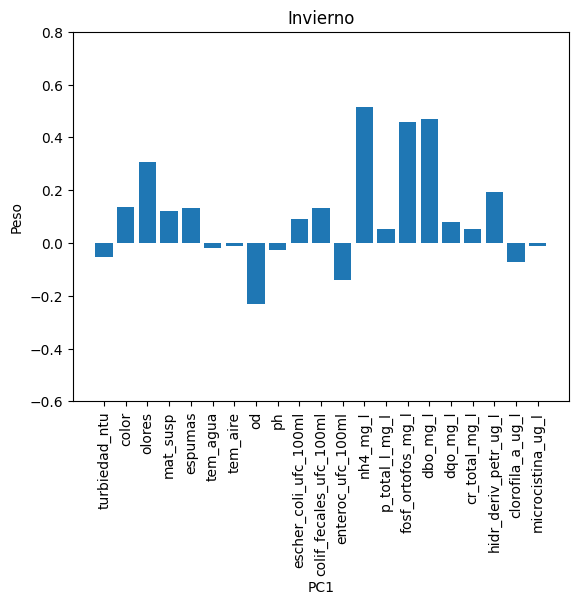

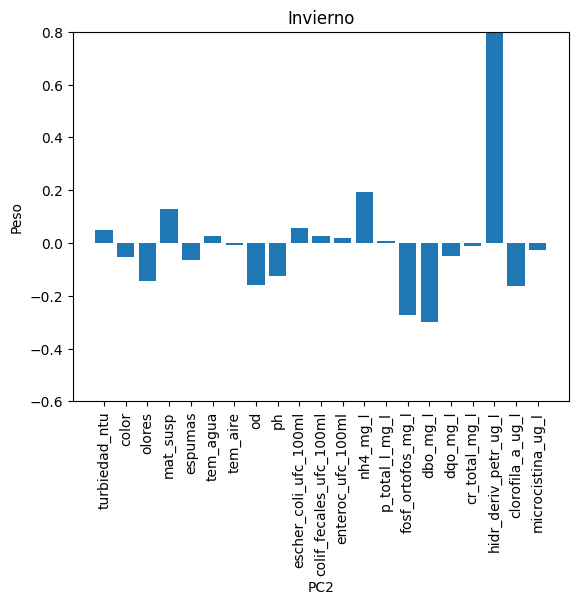

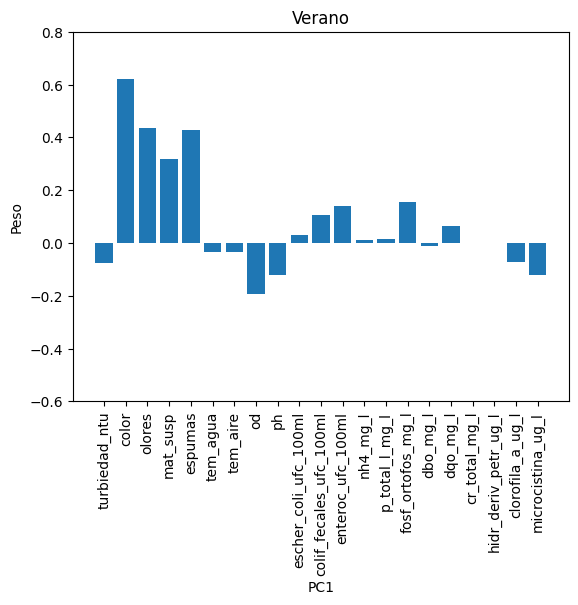

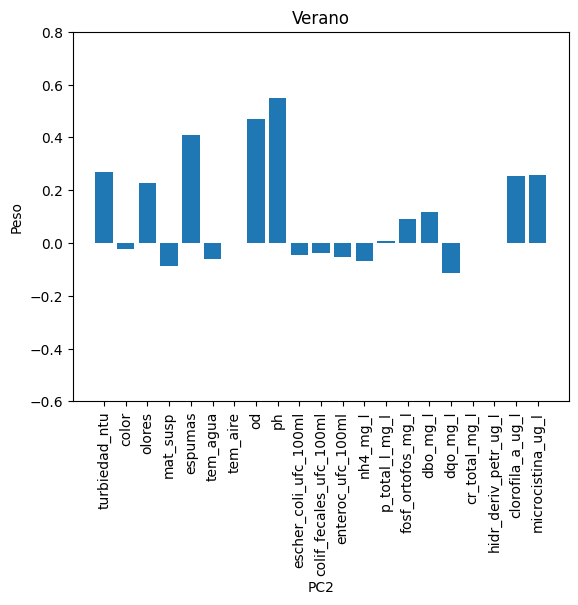

In [ ]:
# Crear el gráfico de barras PC1 invierno
plt.bar(variables, pca_invierno.components_[0])
plt.ylim(-0.6,0.8)
# Agregar etiquetas a los ejes
plt.xlabel("PC1")
plt.ylabel("Peso")
# Agregar un título al gráfico
plt.title("Invierno")
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visualización
# Mostrar el gráfico
plt.show()

# gráfico de barras PC2 invierno
plt.bar(variables, pca_invierno.components_[1])
plt.ylim(-0.6,0.8)
plt.xlabel("PC2")
plt.ylabel("Peso")
plt.title("Invierno")
plt.xticks(rotation=90)  
plt.show()

# gráfico de barras PC1 verano
plt.bar(variables, pca_verano.components_[0])
plt.ylim(-0.6,0.8)
plt.xlabel("PC1")
plt.ylabel("Peso")
plt.title("Verano")
plt.xticks(rotation=90)  
plt.show()

# gráfico de barras
plt.bar(variables, pca_verano.components_[1])
plt.ylim(-0.6,0.8)
plt.xlabel("PC2")
plt.ylabel("Peso")
plt.title("Verano")
plt.xticks(rotation=90)  
plt.show()

-----------------------------------------------------------------------------------------------------------------------------------------

Hipótesis: la presencia de olor, color y espuma (las 3 dicotomicas) se relaciona con un menor índice de calidad del agua (ICA) o calidad del agua(categorica). Intentaremos deducir si existe una relacion entre estas variables, insistiendo sobre el indice de calidad de agua, a ver si le podemos sacar mejor data.

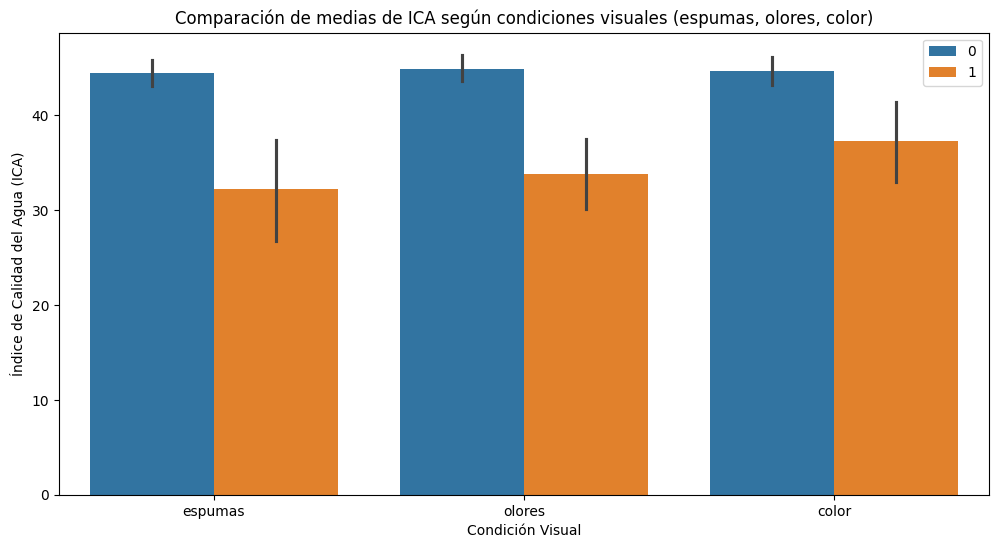

In [ ]:
# Crear un gráfico de barras para comparar las medias de ICA según las condiciones visuales
plt.figure(figsize=(12, 6))

# Gráfico para comparar las medias de ICA según espumas, olores y color
sns.barplot(x='variable', y='ica', hue='valor', 
            data=pd.melt(copy_dataset[['ica', 'espumas', 'olores', 'color']],
             id_vars=['ica'], value_vars=['espumas', 'olores', 'color'], var_name='variable', value_name='valor'))

plt.title("Comparación de medias de ICA según condiciones visuales (espumas, olores, color)")
plt.ylabel("Índice de Calidad del Agua (ICA)")
plt.xlabel("Condición Visual")
plt.legend()
plt.show()

EN 0 SERIA LA MEDIA DE "ICA" SIN LA PRESENCIA DE ESAS VARIABLES EN LA MUESTRA.

EN 1 SERIA LA MEDIA DE "ICA" CON LA PRESENCIA DE ESAS VARIABLES EN LA MUESTRA

VEMOS QUE LA MAS CAMBIANTE ES CON O SIN ESPUMA.

Como trabajamos con variables dicotómicas (olor, color, espuma) para confirmar que existe una relación entre cada una de estas variables y la calidad del agua (que es categórica), tuvimos que hacer varias pruebas de Chi cuadrado de independencia.


In [ ]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia
contingency_table = pd.crosstab(index=copy_dataset['olores'], columns=copy_dataset['calidad_de_agua'])

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir resultados
print(f"Estadístico chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")

Estadístico chi-cuadrado: 5.522865210587194
Valor p: 0.06320116115492465
Grados de libertad: 2


In [ ]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia
contingency_table = pd.crosstab(index=copy_dataset['color'],
                                columns=copy_dataset['calidad_de_agua'])

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir resultados
print(f"Estadístico chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")

Estadístico chi-cuadrado: 1.805597855736616
Valor p: 0.40543329163757746
Grados de libertad: 2


In [ ]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia
contingency_table = pd.crosstab(index=copy_dataset['espumas'], columns=copy_dataset['calidad_de_agua'])

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimir resultados
print(f"Estadístico chi-cuadrado: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")

Estadístico chi-cuadrado: 3.482637875693026
Valor p: 0.17528905271807552
Grados de libertad: 2


En las 3 pruebas de Chi cuadrado obtuvimos p valores mayores a 0.05, indica que no hay suficiente evidencia para rechazar la hipótesis nula. Esto sugiere que no hay una relación estadísticamente significativa entre las variables olor, color y espuma y los niveles de calidad analizados.

La decisión de rechazar la hipótesis depende de los resultados obtenidos y del valor p. En este caso, dado que tanto el test de independencia como el ANOVA no mostraron evidencia significativa (con valores p mayores a 0.05), parece que no se puede concluir que exista una relación significativa entre las variables

--------------------------------------------------------------------------------------------------------------------------------------------------------------

Veremos que pasa en OXIGENO DISUELTO, ya que su valor maximo es bastante alto en comparacion al resto

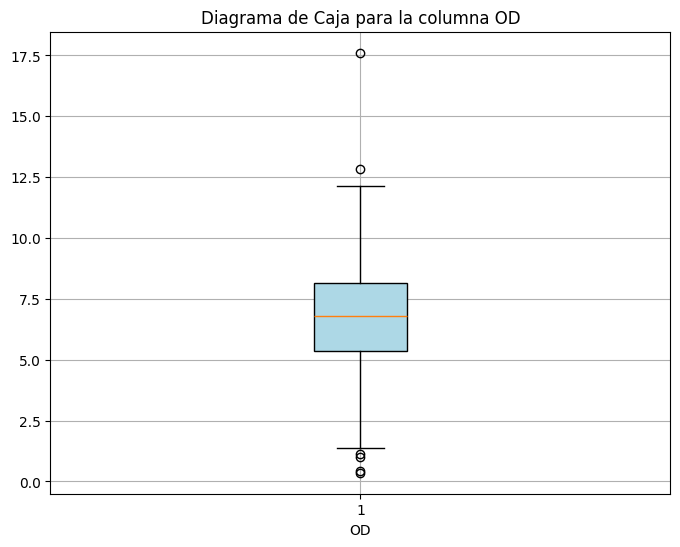

In [ ]:
plt.figure(figsize=(8, 6))

# Creamos BOXPLOT
plt.boxplot(copy_dataset['od'].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor="lightblue"))

plt.title('Diagrama de Caja para la columna OD')
plt.xlabel('OD')
plt.grid(True)

plt.show()

Despues de analizar este boxplot podemos encontrarnos con ciertos outliers, 2 por encima del limite superior y 4 por debajo del limite inferior. vemos que la mediana (Q2) es casi 7, que el Q1 y Q3 estan bastante cerca de de ese valor, lo que indicaria una distribucion bastante equilibrada entre los cuartiles. 
Sabemos que los valores optimos para "OD" oscilan entre 5 y 9. Veremos en que lugar se encuentra ese outlier en 17.5, ya que valores superiores a 10 mg/L son raros y, si aparecen, suelen deberse a procesos de fotosíntesis intensa en ciertas zonas, pero pueden estar acompañados de fluctuaciones.

In [ ]:
copy_dataset[copy_dataset["od"] == 17.610]

,sitios,codigo,fecha,campaña,tem_agua,tem_aire,od,ph,olores,color,espumas,mat_susp,colif_fecales_ufc_100ml,escher_coli_ufc_100ml,enteroc_ufc_100ml,nitrato_mg_l,nh4_mg_l,p_total_l_mg_l,fosf_ortofos_mg_l,dbo_mg_l,dqo_mg_l,turbiedad_ntu,hidr_deriv_petr_ug_l,cr_total_mg_l,cd_total_mg_l,clorofila_a_ug_l,microcistina_ug_l,ica,calidad_de_agua,ica_normalizado,colif_fecales_normalizado,tem_agua_norm,tem_aire_norm,ica_norm
73,Costanera Hudson Calle 63,BZ080,4/5/2022,otoño,17.000,17.000,17.610,9.980,0,0,0,0,4.301,3.000,2.904,6.200,0.050,0.520,0.430,18.000,59.000,60.000,0.100,0.007,0.001,10.000,0.150,40,3,0.321,0.199,0.514,0.565,0.321


El sitio se llama "costanera Hudson Calle 63", que ademas de niveles altisimos de Oxigeno Disuelto, presenta una alta contaminacion fecal, una moderada contaminacion por presencia de nitratos en el agua (influencia de actividades humanas, como la agricultura o las aguas residuales) y una turbiedad sumamente elevada, que podria estar influenciada directamente por el "OD"

Investigando un poco mas en los medios, vemos que Hudson esta marcado por una gran presencia de humedales los cuales ayudan a atrapar el carbono del aire, lo cual es muy importante para mitigar el cambio climatico y albergar biodiversidad. En consecuencia, el nivel de OD de 17 mg/L podría estar relacionado con un efecto de fotosíntesis intensa. Sin embargo, es ideal medir en diferentes momentos del día, ya que el oxígeno disuelto puede variar entre el día y la noche debido a la fotosíntesis y la respiración de los organismos acuáticos.

En conclusion, el outlier examinado podria no ser un error de medicion, en este caso, y si un claro ejemplo del impacto de los humedales

Los humedales pueden crear condiciones excepcionales para el aumento de oxígeno disuelto, esta justificación añade una capa importante de contexto ecológico a los datos, podriamos seguir explayando un poco mas a partir de esto

¿Hay una relacion directa entre los humedales y el oxigeno disuelto en las mediciones? ¿A que otros indicadores puede afectar la presencia de estos?

A este hecho sumarle los desastres causados por los megaemprendimientos y los incendios forestales en los humedales, repercurtiendo en otros indicadores como la turbiedad, el ph, la presencia de nitrato, etc.


filtraremos las 5 muestras con mayor "OXIGENO DISUELTO"

In [ ]:
# Seleccionar las 5 filas con los valores más altos en la columna "OD"
top_5_od = copy_dataset.nlargest(5, 'od')

# Mostrar el resultado
print(top_5_od)

                        sitios codigo      fecha   campaña  tem_agua  tem_aire     od     ph  olores  color  espumas  mat_susp  colif_fecales_ufc_100ml  escher_coli_ufc_100ml  enteroc_ufc_100ml  nitrato_mg_l  nh4_mg_l  p_total_l_mg_l  fosf_ortofos_mg_l  dbo_mg_l  dqo_mg_l  turbiedad_ntu  hidr_deriv_petr_ug_l  cr_total_mg_l  cd_total_mg_l  clorofila_a_ug_l  microcistina_ug_l  ica  calidad_de_agua  ica_normalizado  colif_fecales_normalizado  tem_agua_norm  tem_aire_norm  ica_norm
73   Costanera Hudson Calle 63  BZ080   4/5/2022     otoño    17.000    17.000 17.610  9.980       0      0        0         0                    4.301                  3.000              2.904         6.200     0.050           0.520              0.430    18.000    59.000         60.000                 0.100          0.007          0.001            10.000              0.150   40                3            0.321                      0.199          0.514          0.565     0.321
75           Camping Eva Perón  EN

- Vemos que el ph en las 5 muestras oscila entre 8.3 y 10 lo que indicaria un leve a grave desequilibrio en el agua, producto de algun factor externo.
- Encontramos otra coincidencia. "Puerto Trinidad calle 47" y "Costanera Hudson calle 63" ambos estan en la localidad de Berazategui, y ambos lugares estan siendo victima de daños en los humedales desde hace unos años. La Concentración de nitratos en miligramos por litro (mg/L) en ambos lugares es bastante alta. El DBO y DQO son altisimos tambien.
- En "Puerto Trinidad calle 47" hay una marcada contaminacion fecal y alta presencia de formas de fósforo en el agua.

Vemos que el humano con sus inventos esta impactando severamente en la naturaleza de los humedales y su poder para manter el equilibrio y calidad del agua. Sumado a los incendios forestales desatados intencionalmente

Usaremos gráficos de dispersión (scatter plot) para analizar la relación entre el OD y las variables que sospechamos que pueden estar relacionadas, como PH, DBO, DQO o turbiedad.

metodo de normalizacion MIN-MAX

In [ ]:
# normalizar las columnas 'OD','TURBIEDAD', 'ph', 'dbo' y 'dqo'. método de normalización min-max
copy_dataset['od_normalizado'] = (copy_dataset['od'] - copy_dataset['od'].min()) / (copy_dataset['od'].max() - copy_dataset['od'].min())
copy_dataset['turbiedad_normalizado'] = (copy_dataset['turbiedad_ntu'] - copy_dataset['turbiedad_ntu'].min()) / (copy_dataset['turbiedad_ntu'].max() - copy_dataset['turbiedad_ntu'].min())
copy_dataset['ph_normalizado'] = (copy_dataset['ph'] - copy_dataset['ph'].min()) / (copy_dataset['ph'].max() - copy_dataset['ph'].min())
copy_dataset['dbo_normalizado'] = (copy_dataset['dbo_mg_l'] - copy_dataset['dbo_mg_l'].min()) / (copy_dataset['dbo_mg_l'].max() - copy_dataset['dbo_mg_l'].min())
copy_dataset['dqo_normalizado'] = (copy_dataset['dqo_mg_l'] - copy_dataset['dqo_mg_l'].min()) / (copy_dataset['dqo_mg_l'].max() - copy_dataset['dqo_mg_l'].min())


Hacemos grafico de dispersion para "od y turbiedad"

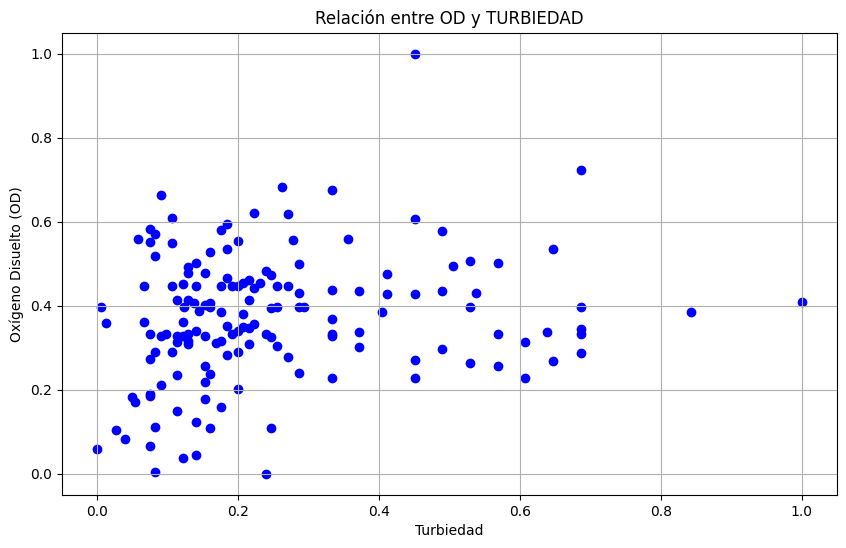

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(copy_dataset['turbiedad_normalizado'], copy_dataset['od_normalizado'], color='blue')
plt.xlabel('Turbiedad')
plt.ylabel('Oxígeno Disuelto (OD)')
plt.title('Relación entre OD y TURBIEDAD')
plt.grid(True)
plt.show()

In [ ]:
# Calcular la correlación de Pearson entre las dos columnas
correlacion = copy_dataset['turbiedad_normalizado'].corr(copy_dataset['od_normalizado'])
print(f"Coeficiente de Correlación de Pearson: {correlacion}")

Coeficiente de Correlación de Pearson: 0.18515657596163515


OBSERVANDO EL GRAFICO Y USANDO EL COEFICIENTE DE PEARSON: Correlación muy débil o inexistente. Casi no hay relación lineal entre las variables "OD" y "turbiedad"

hacemos grafico de dispersion para "od y ph"

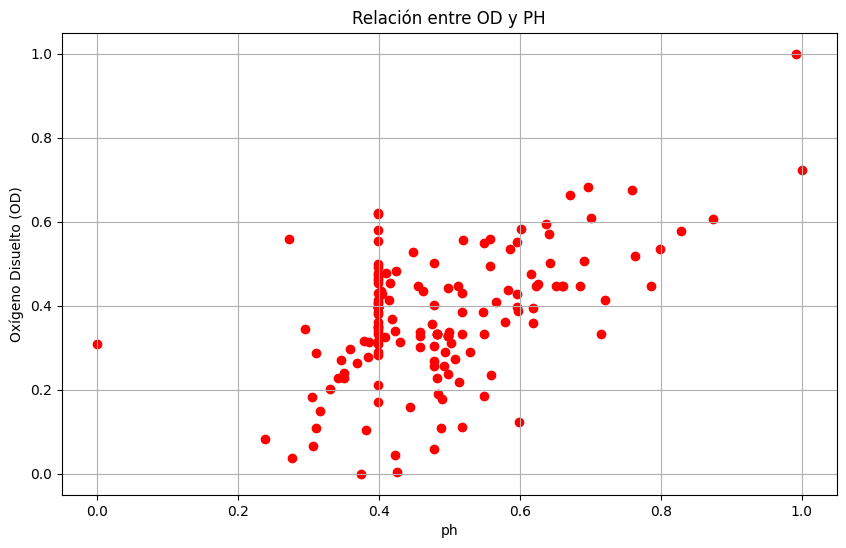

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(copy_dataset['ph_normalizado'], copy_dataset['od_normalizado'], color='red')
plt.xlabel('ph')
plt.ylabel('Oxígeno Disuelto (OD)')
plt.title('Relación entre OD y PH')
plt.grid(True)
plt.show()

In [ ]:
# Calcular la correlación de Pearson entre las dos columnas
correlacion = copy_dataset['ph_normalizado'].corr(copy_dataset['od_normalizado'])
print(f"Coeficiente de Correlación de Pearson: {correlacion}")

Coeficiente de Correlación de Pearson: 0.5333541251594252


OBSERVANDO EL GRAFICO Y USANDO EL COEFICIENTE DE PEARSON: Correlación moderada. Existe una relación lineal clara, aunque no tan intensa entre las variables "OD" y "PH"

Hacemos grafico de dispersion entre "od y DBO"

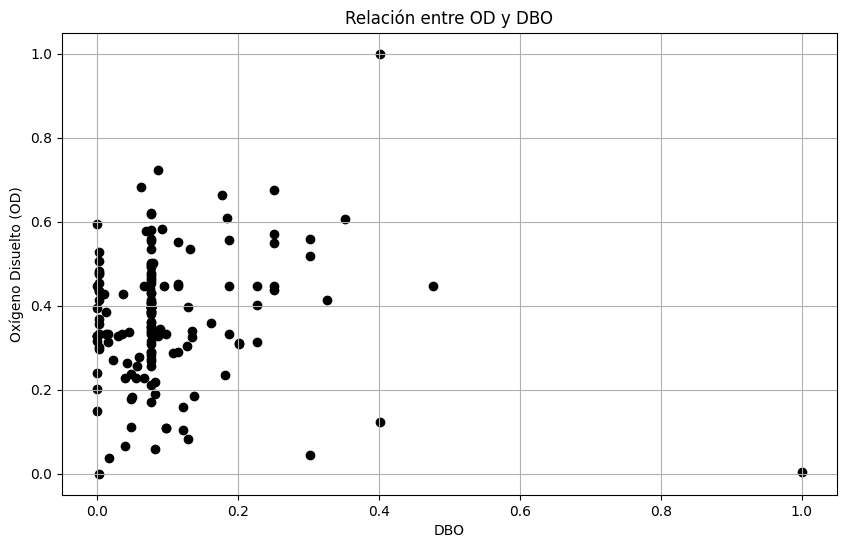

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(copy_dataset['dbo_normalizado'], copy_dataset['od_normalizado'], color='black')
plt.xlabel('DBO')
plt.ylabel('Oxígeno Disuelto (OD)')
plt.title('Relación entre OD y DBO')
plt.grid(True)
plt.show()

In [ ]:
# Calcular la correlación de Pearson entre las dos columnas
correlacion = copy_dataset['dbo_normalizado'].corr(copy_dataset['od_normalizado'])
print(f"Coeficiente de Correlación de Pearson: {correlacion}")

Coeficiente de Correlación de Pearson: 0.048857008650609435


OBSERVANDO EL GRAFICO Y USANDO EL COEFICIENTE DE PEARSON: Correlación muy débil o inexistente. Casi no hay relación lineal entre las variables.

Hacemos grafico de dispersion entre "od y dqo"

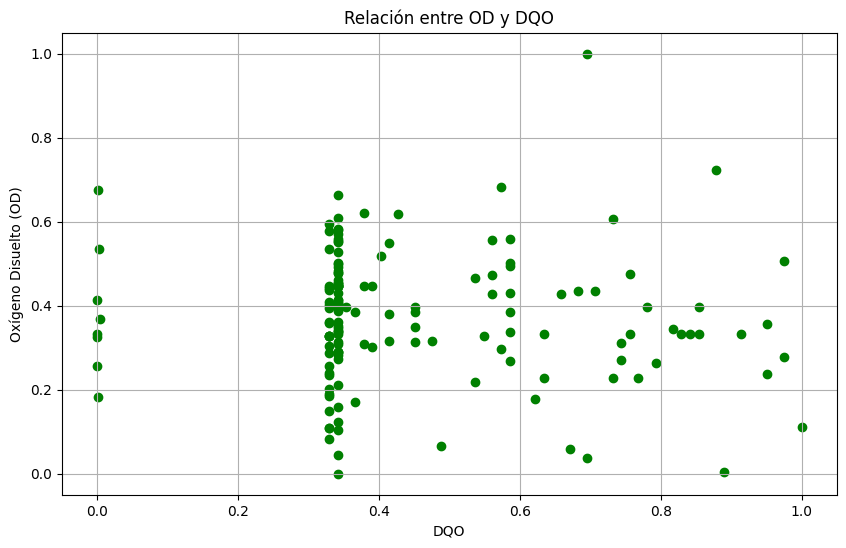

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(copy_dataset['dqo_normalizado'], copy_dataset['od_normalizado'], color='green')
plt.xlabel('DQO')
plt.ylabel('Oxígeno Disuelto (OD)')
plt.title('Relación entre OD y DQO')
plt.grid(True)
plt.show()

In [ ]:
# Calcular la correlación de Pearson entre las dos columnas
correlacion = copy_dataset['dqo_normalizado'].corr(copy_dataset['od_normalizado'])
print(f"Coeficiente de Correlación de Pearson: {correlacion}")

Coeficiente de Correlación de Pearson: -0.06330649736016317


OBSERVANDO EL GRAFICO Y USANDO EL COEFICIENTE DE PEARSON: Correlación muy débil o inexistente. Casi no hay relación lineal entre las variables.

EN CONCLUSION, SOLAMENTE EXISTE UNA RELACION LINEAL CLARA ENTRE EL "OXIGENO DISUELTO Y EL PH", AUNQUE NO ES FUERTE Y PRECISA

---------------------------------------------------------------------------------------------------------------------------------------------------------------

Vimos que el DBO_MG_L era la demanda biológica de oxígeno en miligramos por litro (mg/L), que mide la cantidad de oxígeno requerido por microorganismos para descomponer materia orgánica, y que en valores bastante altos, el agua podria estar recibiendo grandes cantidades de materia orgánica, posiblemente debido a descargas de aguas residuales, desechos industriales o actividad agrícola.

veremos con que variable podria estar potencialmente relacionada

antes que nada borrar viejas columnas creadas para normalizar

In [ ]:
copy_dataset = copy_dataset.drop(['dbo_normalizado', 'ph_normalizado', 'od_normalizado','dqo_normalizado','tem_agua_norm','tem_aire_norm','turbiedad_normalizado','ica_norm'], axis=1)

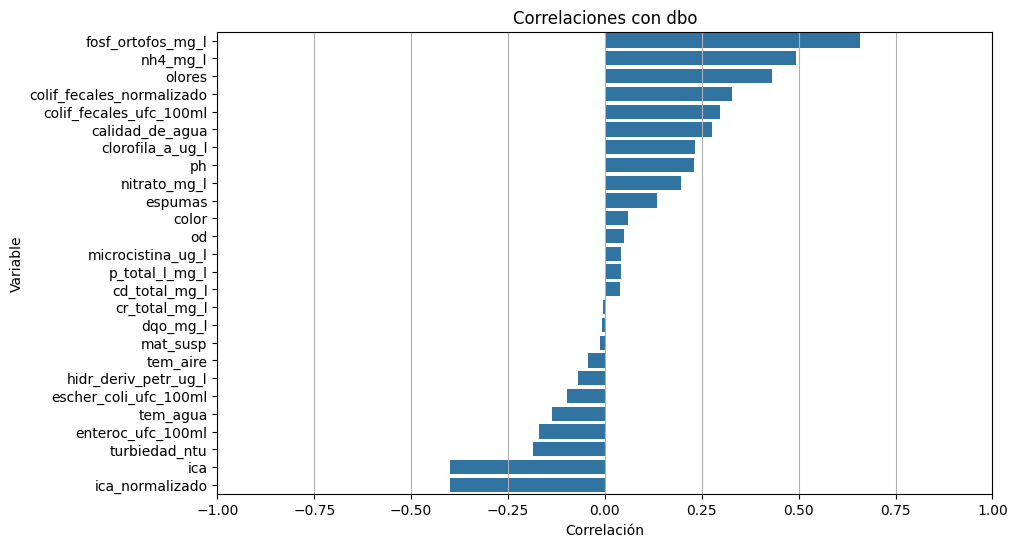

In [ ]:
dbo_correlation = copy_dataset.corr(numeric_only=True)["dbo_mg_l"].drop("dbo_mg_l")
sorted_correlations = dbo_correlation.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.grid(True)
sns.barplot(x=sorted_correlations.values, y=sorted_correlations.index)
plt.title('Correlaciones de la Demanda Biológica de Oxígeno (DBO) con Otras Variables')
plt.xlabel('Correlación')
plt.ylabel('')
plt.xlim([-1, 1])
plt.show()

Vemos que se tiene una correlacion bastante alta con fosfo_ortofos, entonces vamos a visualizar la relacion que tienen a traves de un Scatter-Plot

In [ ]:
from scipy.stats import shapiro

dbo_dataset = copy_dataset["dbo_mg_l"]
fosf_dataset = copy_dataset["fosf_ortofos_mg_l"]

stat,p = shapiro(dbo_dataset)
print(f"Test de Shapiro-Wilk para la variable dbo: Estadístico={stat:.3f}, p-valor={p:.3f}")

stat,p = shapiro(fosf_dataset)
print(f"Test de Shapiro-Wilk para la variable fosf: Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para la variable dbo: Estadístico=0.655, p-valor=0.000
Test de Shapiro-Wilk para la variable fosf: Estadístico=0.725, p-valor=0.000


El test de Shapiro-Wilk nos dice que ninguna de las dos variables sigue una distribucion normal

Por lo tantos haremos pruebas no parametricas,pero para ello veremos si tienen homocedasticidad primero


In [ ]:
from scipy.stats import levene

stat, p = levene(dbo_correlation, fosf_dataset)
print(f"Test de Levene para la Homocedasticidad: Estadístico={stat:.3f}, p-valor={p:.3f}")


Test de Levene para la Homocedasticidad: Estadístico=0.002, p-valor=0.965


Vemos que son homocedasticas, por lo tanto ya probamos que las variables no son normales y vimos que su distribucion es homocedasticas entonces podemos utilizar un test de Spearman

In [ ]:
from scipy.stats import spearmanr

# Calcular la correlación de Spearman
correlacion, p_valor = spearmanr(copy_dataset["dbo_mg_l"], copy_dataset["fosf_ortofos_mg_l"])

# Imprimir los resultados
print(f"Coeficiente de correlación de Spearman: {correlacion:.4f}")
print(f"P-valor: {p_valor:.4f}")

# Interpretación del p-valor
if p_valor < 0.05:
    print("La correlación es significativa.")
else:
    print("No hay evidencia suficiente para afirmar que la correlación es significativa.")

Coeficiente de correlación de Spearman: 0.4130
P-valor: 0.0000
La correlación es significativa.


El análisis de correlación de Spearman realizado entre las variables dbo_mg_l y fosf_ortofos_mg_l arrojó un coeficiente de 0.4130 indicando una correlación positiva moderada entre ambas. Además, el p-valor obtenido fue 0.0000, lo que confirma que esta correlación es estadísticamente significativa (p < 0.05). Por lo tanto, se puede concluir que existe una relación significativa entre las concentraciones de DBO y fosfatos ortofosfatos en el dataset.#Elegir entre esta conclusion o la de abajo

Como vemos nuestro p-valor es menos que nuestro nivel de significancia(0.5) entonces rechazamos nuestra hipotesis nula y vemos que la concentracion de fosforo ortofosfato no implica una mayor demanda de biologica de oxigeno

-----------------------------------------------------------------------------------------------------------------------------------------------------------

Hipótesis 5: La presencia de materia orgánica suspendida está asociada con un aumento en los niveles de Demanda Biológica de Oxígeno  (DBO) y Demanda Química de Oxígeno (DQO)

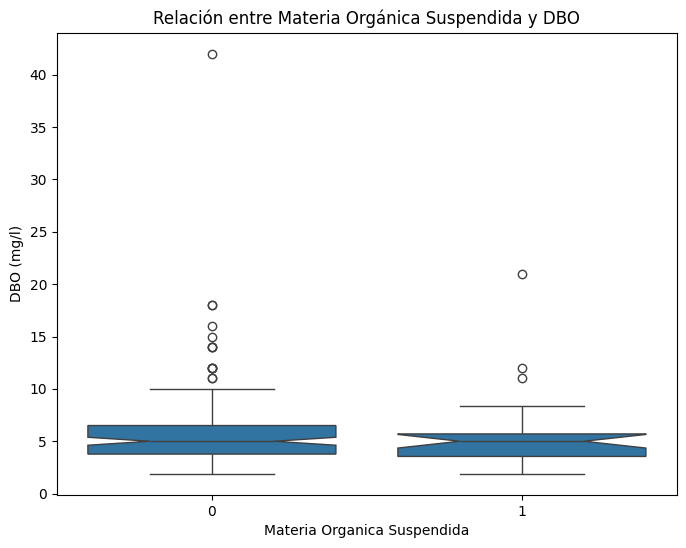

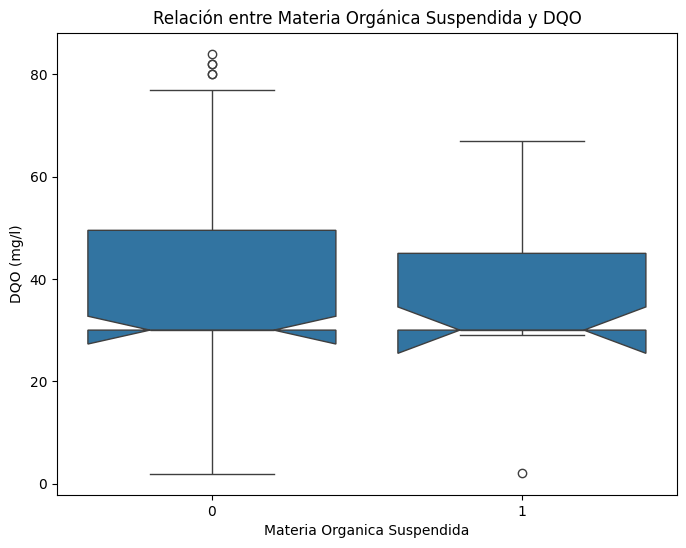

In [ ]:
# inicio HIPOTESIS 5
import pandas as pd
import matplotlib.pyplot as plt

# Crear el boxplot 
plt.figure(figsize=(8, 6))
sns.boxplot(x="mat_susp", y="dbo_mg_l", data=copy_dataset, notch=True)
# Agregar etiquetas a los ejes
plt.xlabel("Materia Organica Suspendida")
plt.ylabel("DBO (mg/l)")
# Agregar un título al gráfico
plt.title("Relación entre Materia Orgánica Suspendida y DBO")
# Mostrar el gráfico
plt.show()

# Crear el boxplot 
plt.figure(figsize=(8, 6))
sns.boxplot(x="mat_susp", y="dqo_mg_l", data=copy_dataset, notch=True)
# Agregar etiquetas a los ejes
plt.xlabel("Materia Organica Suspendida")
plt.ylabel("DQO (mg/l)")
# Agregar un título al gráfico
plt.title("Relación entre Materia Orgánica Suspendida y DQO")
# Mostrar el gráfico
plt.show()

In [ ]:
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler

# Separamos los datos en dos grupos
DBO_con_mat_susp = copy_dataset[copy_dataset['mat_susp'] == 1]['dbo_mg_l']
DBO_sin_mat_susp = copy_dataset[copy_dataset['mat_susp'] == 0]['dbo_mg_l']

# Test de Shapiro-Wilk 
stat, p = shapiro(DBO_con_mat_susp)
print(f"Test de Shapiro-Wilk para muestras con materia organica suspendida (DBO): Estadístico={stat:.3f}, p-valor={p:.3f}")
# Test de Shapiro-Wilk
stat, p = shapiro(DBO_sin_mat_susp)
print(f"Test de Shapiro-Wilk para muestras sin materia organica suspendida (DBO): Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Shapiro-Wilk para muestras con materia organica suspendida (DBO): Estadístico=0.708, p-valor=0.000
Test de Shapiro-Wilk para muestras sin materia organica suspendida (DBO): Estadístico=0.644, p-valor=0.000


El Test de Shapiro-Wilk da que no hay normalidad. Debemos descartar la posibilidad de realizar un test T.

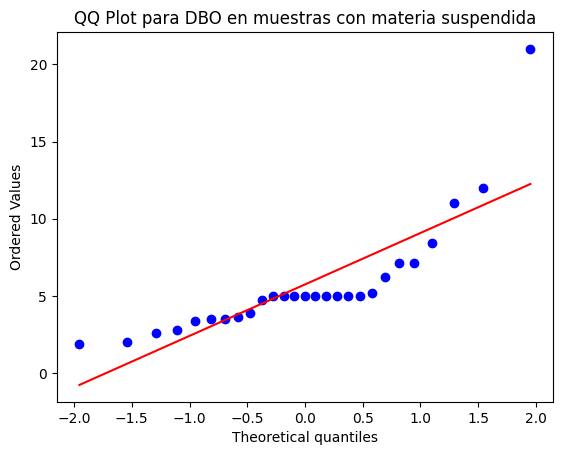

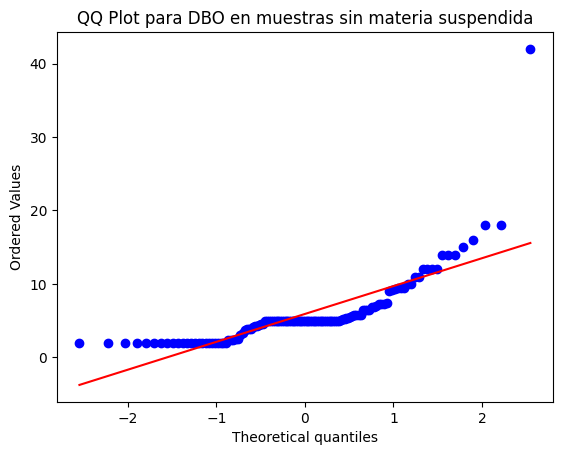

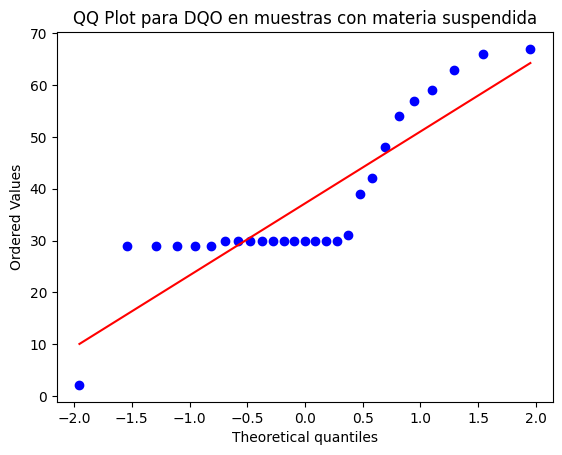

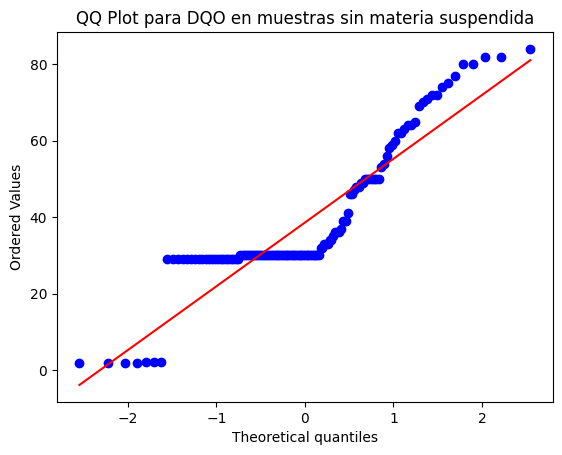

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# QQ plot DBO CON mat_susp
stats.probplot(DBO_con_mat_susp, dist="norm", plot=plt)
plt.title("QQ Plot para DBO en muestras con materia suspendida")
plt.show()

# QQ plot DBO SIN mat_susp
stats.probplot(DBO_sin_mat_susp, dist="norm", plot=plt)
plt.title("QQ Plot para DBO en muestras sin materia suspendida")
plt.show()

# QQ plot DQO CON mat_susp
stats.probplot(DQO_con_mat_susp, dist="norm", plot=plt)
plt.title("QQ Plot para DQO en muestras con materia suspendida")
plt.show()

# QQ plot DQO SIN mat_susp
stats.probplot(DQO_sin_mat_susp, dist="norm", plot=plt)
plt.title("QQ Plot para DQO en muestras sin materia suspendida")
plt.show()

In [ ]:
# Test de Levene para validar homocesticidad
stat, p = stats.levene(DBO_con_mat_susp, DBO_sin_mat_susp)
print(f"Test de Levene (DBO): Estadístico={stat:.3f}, p-valor={p:.3f}")

# Test de Levene para validar homocesticidad
stat, p = stats.levene(DQO_con_mat_susp, DQO_sin_mat_susp)
print(f"Test de Levene (DQO): Estadístico={stat:.3f}, p-valor={p:.3f}")

Test de Levene (DBO): Estadístico=0.193, p-valor=0.661
Test de Levene (DQO): Estadístico=0.556, p-valor=0.457


Para validar la homocedasticidad de varianzas realizamos un test de Levene.  Levene: la hipótesis nula es que las varianzas son significativamente diferentes entre sí (hay heterocedasticidad), por lo que pedimos que el test nos de un p-valor mayor a 0.05 para homocedasticidad. Nos dio como resultado, 0.661 y 0.577 que son mayores a 0.05, así que hay homocedasticidad de los datos.



Se cumple con el requisito de homocedasticidad pero no normalidad, podemos hacer test de Mann Whitney U. Si el p-valor del test nos da por debajo del umbral de significancia, efectivam ente hay una diferencia significativa entre ambos grupos


In [ ]:
# Test de Mann-Whitney U para DBO
stat, p = stats.mannwhitneyu(DBO_con_mat_susp, DBO_sin_mat_susp)
print(f"Test de Mann-Whitney U para dbo_mg_l: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el DBO entre muestras con materia organica suspendida y sin materia organica suspendida")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el DBO entre muestras con materia organica suspendida y sin materia orgánica suspendida")

Test de Mann-Whitney U para dbo_mg_l: Estadístico=1698.000, p-valor=0.938
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en el DBO entre muestras con materia organica suspendida y sin materia organica suspendida


Para DBO obtuvimos un p valor de 0.938, que es muchísimo mayor al umbral de significancia 0.05.   Para DQO nos dio 0.512, lo que indica que las diferencias de DBO/DQO con o sin materia suspendida, no son significativas.

In [ ]:
# Test de Mann-Whitney U para DQO
stat, p = stats.mannwhitneyu(DQO_con_mat_susp, DQO_sin_mat_susp)
print(f"Test de Mann-Whitney U para dqo_mg_l: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("No hay una diferencia significativa en el DQO entre muestras con materia organica suspendida y sin materia organica suspendida")
else:
    print("Se rechaza la hipótesis nula.")
    print("Existe una diferencia significativa en el DQO entre muestras con materia organica suspendida y sin materia orgánica suspendida")

Test de Mann-Whitney U para dqo_mg_l: Estadístico=1641.500, p-valor=0.724
No hay suficiente evidencia para rechazar la hipótesis nula.
No hay una diferencia significativa en el DQO entre muestras con materia organica suspendida y sin materia organica suspendida


Podemos decir que nuestra hipótesis se rechaza, y por lo tanto no podemos afirmar que la presencia de materia orgánica suspendida está asociada con un aumento en los niveles de Demanda Biológica de Oxígeno  (DBO) y Demanda Química de Oxígeno (DQO), al menos en nuestro conjunto de datos

--------------------------------------------------------------------------------------------------------------------------------------------------------------------

Hipótesis 6: A mayor cantidad de materia suspendida, mayores serán las concentraciones de coliformes fecales, Escherichia coli y enterococos.

Para empezar realizaremos un PCA con las tres variables de interes para ver si podemos reducir la dimensionalidad, y veamos una gráfica en 3D

[0.53867083 0.29024039 0.17108877]


c:\Users\Matias\Desktop\TP ESPECIAL - CIENCIA DE DATOS\practicoespecialvenv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


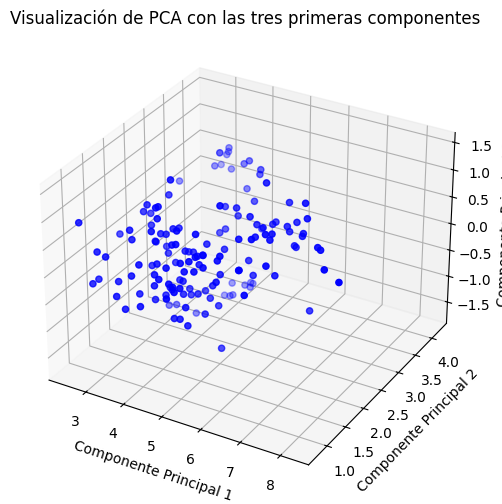

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

var_princ = ["colif_fecales_ufc_100ml", "escher_coli_ufc_100ml","enteroc_ufc_100ml"]
coli = copy_dataset[var_princ]

scaler = StandardScaler()
coli_norm = scaler.fit_transform(coli)

pca = PCA(n_components=3)
pca.fit(coli_norm)

print(pca.explained_variance_ratio_)

data_pca = pca.transform(coli)

# Crear una figura y un subplot en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c='b', marker='o')

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

plt.title('Visualización de PCA con las tres primeras componentes')
plt.show()

Vemos que no se logra apreciar muy bien en el 3D, asi que analizaremos la varianza explicada.

La primera componente explica el 53.37% de la varianza.

La segunda componente contribuye con un 29%.

La tercera componente explica el 17% restante.

Las dos primeras componentes juntas explican el 99.52% de la varianza total. Por lo tanto vamos a realizar un PCA con dos componentes

In [ ]:
# Coeficientes de las variables en cada componente principal
loadings = pca.components_

# Mostrar los loadings
for i, var in enumerate(var_princ):
    print(f"{var}: {loadings[:, i]}")

colif_fecales_ufc_100ml: [ 0.416508    0.90911126 -0.00614827]
escher_coli_ufc_100ml: [ 0.64351801 -0.29003629  0.70835268]
enteroc_ufc_100ml: [ 0.64218818 -0.29899108 -0.7058319 ]


Primera componente: estas dos variables son las más influyentes en la primera componente principal.

Segunda componente: es la que más contribuye a esta componente.

Tercera componente: tiene la mayor contribución negativa en esta componente. Escher_coli_ufc_100ml también tiene un valor significativo, pero con signo positivo. 

Entonces voy a hacer un pca con las variables mas significativas, colif_fecales_ufc_100ml y escher_coli_ufc_100ml para obtener una representacion mas reducida

Varianza explicada por cada componente principal:
[0.60065875 0.39934125]


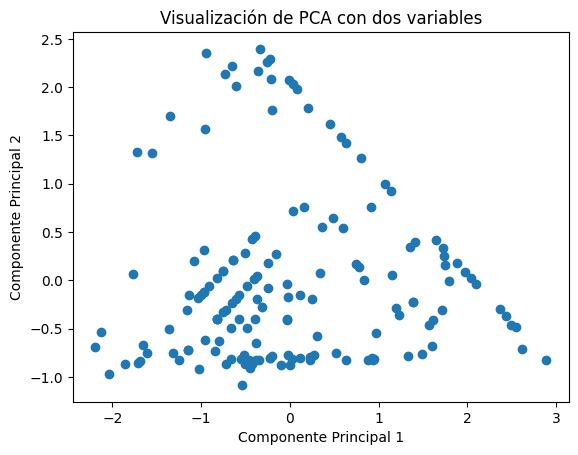

In [ ]:
# Seleccionamos solo las dos variables de interés
var_princ_2 = ["colif_fecales_ufc_100ml", "escher_coli_ufc_100ml"]
coli_2 = copy_dataset[var_princ_2]

# Estandarización
scaler = StandardScaler()
coli_2_norm = scaler.fit_transform(coli_2)

# PCA con 2 componentes
pca_2 = PCA(n_components=2)
pca_2.fit(coli_2_norm)

# Varianza explicada
print("Varianza explicada por cada componente principal:")
print(pca_2.explained_variance_ratio_)

# Transformación a las componentes principales
data_pca_2 = pca_2.transform(coli_2_norm)

# Visualización
plt.scatter(data_pca_2[:, 0], data_pca_2[:, 1])
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de PCA con dos variables')
plt.show()

Ahora que estamos en 2D se puede visualizar mejor, vemos que la mayoria de datos están centrados en la parte izquierda del gráfico y podemos ver que existen varios outliers, así que atraves de mahalanobis calcularemos la cantidad de outliers.

Ademas podemos analizar las dos componentes principales:

Componente Principal 1: Esta componente 'atrapa' el 60.89% de la varianza explicada.

Componente Principal 1: Mientras que esta componente 'atrapa' el 39.10% restante.

In [ ]:
from scipy.spatial.distance import mahalanobis

# Calcular la matriz de covarianza inversa
cov_matrix = np.cov(data_pca_2.T)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Calcular la distancia de Mahalanobis para cada punto
mean_vector = np.mean(data_pca_2, axis=0)
distances = [mahalanobis(row, mean_vector, inv_cov_matrix) for row in data_pca_2]

# Definir un umbral para outliers
threshold = np.percentile(distances, 97.5)
outliers = np.where(distances > threshold)[0]

print(f"Indices de outliers: {outliers}")

Indices de outliers: [76 91 92 96]


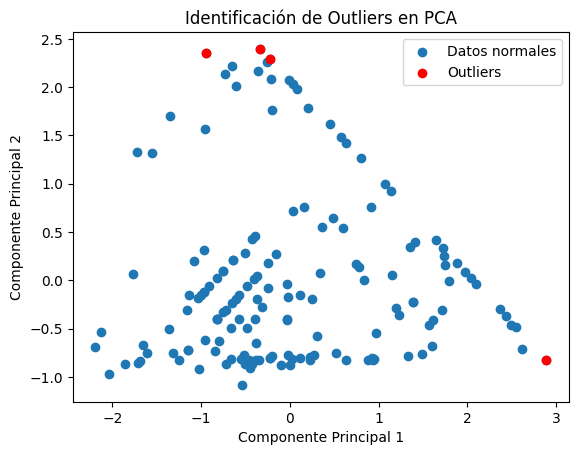

In [ ]:
plt.scatter(data_pca_2[:, 0], data_pca_2[:, 1], label="Datos normales")
plt.scatter(data_pca_2[outliers, 0], data_pca_2[outliers, 1], color='red', label="Outliers")
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Identificación de Outliers en PCA')
plt.legend()
plt.show()

Vemos que mahanalobis nos dio que existen 4 outliers, entonces vamos a eliminarlo ya que nos generan ruido

In [ ]:
# Crear una copia de los datos sin los outliers
copy_dataset_cleaned = copy_dataset.drop(index=copy_dataset.index[outliers])

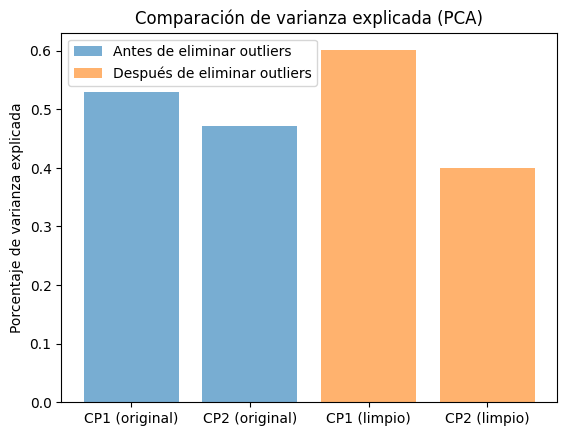

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Variables originales estandarizadas
scaler = StandardScaler()
coli_2_norm = scaler.fit_transform(copy_dataset[["colif_fecales_ufc_100ml", "escher_coli_ufc_100ml"]])

# PCA inicial para detectar outliers
pca = PCA(n_components=2)
data_pca_2 = pca.fit_transform(coli_2_norm)

# Detectar outliers
threshold = 3
outliers = np.where(np.abs(data_pca_2[:, 0]) > threshold)[0]

# Eliminar los outliers de los datos estandarizados
coli_2_norm_cleaned = np.delete(coli_2_norm, outliers, axis=0)

# Aplicar PCA a los datos limpios
pca_cleaned = PCA(n_components=2)
pca_cleaned.fit(coli_2_norm_cleaned)

# Varianza explicada después de eliminar outliers
explained_variance_cleaned = pca_cleaned.explained_variance_ratio_

# Comparación antes y después
varianza_original = [0.52893891, 0.47106109]  # Varianza antes de eliminar outliers
varianza_limpia = explained_variance_cleaned

# Graficar comparación
plt.bar(["CP1 (original)", "CP2 (original)"], varianza_original, alpha=0.6, label="Antes de eliminar outliers")
plt.bar(["CP1 (limpio)", "CP2 (limpio)"], varianza_limpia, alpha=0.6, label="Después de eliminar outliers")
plt.ylabel("Porcentaje de varianza explicada")
plt.title("Comparación de varianza explicada (PCA)")
plt.legend()
plt.show()

Vemos que luego de la eliminacion de los outlier no cambio mucho, por lo tanto nos quedaremos con ambas componentes principales.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las variables que te interesan
variables_interes = copy_dataset[['colif_fecales_ufc_100ml', 'escher_coli_ufc_100ml']]

# Estandarizar las variables
scaler = StandardScaler()
original_data_cleaned = scaler.fit_transform(variables_interes)

# Obtener los loadings (pesos de las variables en cada componente)
loadings = pd.DataFrame(
    pca_cleaned.components_,  # Coeficientes de las variables
    columns=variables_interes.columns,  # Nombres de las columnas originales
    index=["Componente Principal 1", "Componente Principal 2"]  # Etiquetas de las componentes
)

# Mostrar los pesos
print("Pesos de las variables en las componentes principales:")
print(loadings)

Pesos de las variables en las componentes principales:
                        colif_fecales_ufc_100ml  escher_coli_ufc_100ml
Componente Principal 1                    0.707                  0.707
Componente Principal 2                    0.707                 -0.707


Del resultado obtenido vemos lo siguiente:

Componente Principal 1: Las variables colif_fecales_ufc_100ml y escher_coli_ufc_100ml tienen el mismo peso positivo (0.707) en esta componente, lo que indica que ambas variables tienden a comportarse de manera similar.

Componente Principal 2: En esta componente, las variables tienen pesos opuestos (-0.707 para colif_fecales_ufc_100ml y 0.707 para escher_coli_ufc_100ml). Esto sugiere que están en relación inversa: cuando una variable aumenta, la otra tiende a disminuir.

Por lo tanto nos quedaremos con ambas variables para el testeo de la hipotesis, pero antes que eso analizaremos su correlacion.

In [ ]:
# Seleccionar las columnas de interés
var_interes = ["mat_susp", "colif_fecales_ufc_100ml", "escher_coli_ufc_100ml"]
data_correlacion = copy_dataset[var_interes]

# Calcular la matriz de correlación
correlacion = data_correlacion.corr()

# Mostrar la matriz de correlación
print(correlacion)

                         mat_susp  colif_fecales_ufc_100ml  escher_coli_ufc_100ml
mat_susp                    1.000                    0.069                  0.213
colif_fecales_ufc_100ml     0.069                    1.000                  0.201
escher_coli_ufc_100ml       0.213                    0.201                  1.000


La materia suspendida tiene una correlación débil con E. coli (0.213), pero es casi nula con los coliformes fecales (0.069). Esto sugiere que la relación esperada entre materia suspendida y los indicadores microbiológicos podría no ser tan fuerte o directa como se anticipaba en la hipótesis.

Vamos a ver que nos dice el test de hipotesis, para ello utilizaremos el test. Pero primero veamos si son normales haciendo un test de Shapiro-Wilks

In [ ]:
from scipy.stats import shapiro

variables = ["mat_susp", "colif_fecales_ufc_100ml", "escher_coli_ufc_100ml"]
for var in variables:
    stat, p = shapiro(copy_dataset[var])
    print(f"Test de Shapiro-Wilks para la variable {var}: estadístico={stat:.4f}, p-valor={p:.4f}")
    if p < 0.05:
        print(f"La variable {var} no sigue una distribución normal.")
    else:
        print(f"La variable {var} sigue una distribución normal.")
    print(f" ")

Test de Shapiro-Wilks para la variable mat_susp: estadístico=0.4604, p-valor=0.0000
La variable mat_susp no sigue una distribución normal.
 
Test de Shapiro-Wilks para la variable colif_fecales_ufc_100ml: estadístico=0.9357, p-valor=0.0000
La variable colif_fecales_ufc_100ml no sigue una distribución normal.
 
Test de Shapiro-Wilks para la variable escher_coli_ufc_100ml: estadístico=0.9860, p-valor=0.1217
La variable escher_coli_ufc_100ml sigue una distribución normal.
 


vemos que para los 2 primeros indicadores no sigue una distribucion normal, pero para la tercera si "escher_coli_ufc_100ml". Test de correlación de Pearson. Este test evalúa si existe una relación lineal entre dos variables.

In [ ]:
from scipy.stats import pearsonr

# Calcular el coeficiente de correlación de Pearson
corr_coefficient, p_value = pearsonr(copy_dataset['escher_coli_ufc_100ml'], copy_dataset['mat_susp'])

# Interpretación
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Hay una correlación significativa")
else:
    print("No rechazamos la hipótesis nula: No hay correlación significativa")

Rechazamos la hipótesis nula: Hay una correlación significativa


Encontramos una correlacion significativa entre materia suspendida y ESCHER_COLI_UFC_100ML

Ccontinuamos con las otras que no siguen una distribucion normal

In [ ]:
from scipy.stats import levene

# Realizar el test de Levene para las tres variables
stat, p = levene(copy_dataset["mat_susp"], copy_dataset["colif_fecales_ufc_100ml"])

print(f"Test de Levene: estadístico={stat:.4f}, p-valor={p:.4f}")

# Interpretación del p-valor
if p < 0.05:
    print("Las varianzas no son homogéneas (no se cumple la homocedasticidad).")
else:
    print("Las varianzas son homogéneas (se cumple la homocedasticidad).")

Test de Levene: estadístico=131.1400, p-valor=0.0000
Las varianzas no son homogéneas (no se cumple la homocedasticidad).


Viendo que no tenemos normalidad y tampoco tenemos homocedasticidad, entonces vamos a tener que utilizar el test de Kruskal-Wallis.

In [ ]:
from scipy import stats
stat, p = stats.kruskal(copy_dataset["mat_susp"], copy_dataset["colif_fecales_ufc_100ml"])
print(f"Test de Kruskal-Wallis para la materia suspendida: Estadístico={stat:.3f}, p-valor={p:.3f}")

# Interpretación de los resultados
alpha = 0.05  # Nivel de significancia
if p > alpha:
    print("No hay suficiente evidencia para rechazar la hipótesis nula.")
    print("Hay diferencias significativas entre las medianas de las variables.")
else:
    print("Se rechaza la hipótesis nula.")
    print("No hay diferencias significativas entre las medianas de las variables.")

Test de Kruskal-Wallis para la materia suspendida: Estadístico=247.884, p-valor=0.000
Se rechaza la hipótesis nula.
No hay diferencias significativas entre las medianas de las variables.


El test de Kruskal-Wallis ha mostrado que existen diferencias significativas entre las distribuciones de las variables, lo que sugiere que la concentracion de materia suspendida, coliformes fecales y enterococos tienen comportamientos diferentes en términos de sus distribuciones.